# Companies bankruptcy forecast
## The objective is to design a classifier for bankruptcy status prediction


Bankruptcy prediction has been a subject of interests for almost a century and it still ranks high among hottest topics in economics. 

The aim of predicting financial distress is to develop a predictive model that combines various econometric measures and allows to foresee a financial condition of a firm.

The purpose of the bankruptcy prediction is to assess the financial condition of a company and its future perspectives within the context of longterm operation on the market.

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifierCV
from sklearn.linear_model import Ridge

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve

from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier,StackingClassifier,BaggingRegressor
import time
import datetime
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,roc_auc_score
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
from xgboost import XGBClassifier

In [132]:
files = []
for i in range(1, 6):
    counter = str(i)
    name = counter + 'year.arff'
    files.append(name)
print("Files: ", files)

Files:  ['1year.arff', '2year.arff', '3year.arff', '4year.arff', '5year.arff']


In [133]:
from scipy.io import arff
file_data = []
for file in files:
    file_data.append(arff.loadarff(file))
print(file_data[0:2])

[(array([( 0.20055 , 0.37951,  0.39641, 2.0472 ,   32.351 , 0.38825 ,  0.24976 , 1.3305  , 1.1389 , 0.50494 , 0.24976 ,  0.6598  ,  0.1666  ,  0.24976 ,    497.42,  0.73378 , 2.6349,  0.24976 ,  0.14942 , 43.37  , 1.2479 , 0.21402 ,  0.11998 , 0.47706 , 0.50494 ,  0.60411 ,  1.4582 ,  1.7615 , 5.9443, 0.11788, 0.14942 ,  94.14 , 3.8772, 0.56393 ,  0.21402 , 1.741  , 5.9327e+02, 0.50591,  0.12804 , 0.66295 , 0.051402, 0.12804 , 114.42 ,  71.05 ,  1.0097  , 1.5225 ,  49.394 ,  0.1853  ,  0.11085 , 2.042  , 0.37854, 0.25792,  2.2437 ,  2.248  ,  3.4869e+05,  0.12196 ,  0.39718 , 0.87804, 1.9240e-03,  8.416 , 5.1372,  82.658, 4.4158,  7.4277 , b'0'),
       ( 0.20912 , 0.49988,  0.47225, 1.9447 ,   14.786 , 0.      ,  0.25834 , 0.99601 , 1.6996 , 0.49788 , 0.26114 ,  0.5168  ,  0.15835 ,  0.25834 ,    677.96,  0.53838 , 2.0005,  0.25834 ,  0.152   , 87.981 , 1.4293 , 0.24806 ,  0.12304 ,      nan, 0.39542 ,  0.43992 , 88.444  , 16.946  , 3.6884, 0.26969, 0.152   , 122.17 , 2.9876, 2.9876  

In [134]:
for i in range(0, len(file_data)):
    if i==0:
        cb_df = pd.DataFrame.from_records(data = file_data[i][0])
        continue
    if i!=0:
        d = pd.DataFrame.from_records(data = file_data[i][0])
        cb_df = cb_df.append(d)

In [135]:
cb_df.shape

(43405, 65)

In [136]:
cb_df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [137]:
cb_df['class'] = cb_df['class'].astype('int')
cb_df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [138]:
dataset=cb_df

In [139]:
datafield=pd.read_excel('Companies_bankruptcy_datafield.xlsx')


In [140]:
datafield

,Data fields
0,attr1 - net profit / total assets
1,attr2 - total liabilities / total assets
2,attr3 - working capital / total assets
3,attr4 - current assets / short-term liabilities
4,attr5 - [(cash + short-term securities + recei...
...,...
60,attr61 - sales / receivables
61,attr62 - (short-term liabilities *365) / sales
62,attr63 - sales / short-term liabilities
63,attr64 - sales / fixed assets


In [141]:
cb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43405 entries, 0 to 5909
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43397 non-null  float64
 1   Attr2   43397 non-null  float64
 2   Attr3   43397 non-null  float64
 3   Attr4   43271 non-null  float64
 4   Attr5   43316 non-null  float64
 5   Attr6   43397 non-null  float64
 6   Attr7   43397 non-null  float64
 7   Attr8   43311 non-null  float64
 8   Attr9   43396 non-null  float64
 9   Attr10  43397 non-null  float64
 10  Attr11  43361 non-null  float64
 11  Attr12  43271 non-null  float64
 12  Attr13  43278 non-null  float64
 13  Attr14  43397 non-null  float64
 14  Attr15  43369 non-null  float64
 15  Attr16  43310 non-null  float64
 16  Attr17  43311 non-null  float64
 17  Attr18  43397 non-null  float64
 18  Attr19  43277 non-null  float64
 19  Attr20  43278 non-null  float64
 20  Attr21  37551 non-null  float64
 21  Attr22  43397 non-null  float64
 22 

In [142]:
cb_df['class'].value_counts(normalize=True)

0    0.951826
1    0.048174
Name: class, dtype: float64

- 5% of bankruptcy

In [143]:
cb_df1 = cb_df.fillna(cb_df.mean())
cb_df1.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,43405.000000,43405.000000,43405.000000,43405.000000,4.340500e+04,43405.000000,43405.000000,43405.000000,43405.000000,43405.000000,...,4.340500e+04,43405.000000,4.340500e+04,43405.000000,4.340500e+04,43405.000000,4.340500e+04,43405.000000,43405.000000,43405.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592,0.048174
std,2.993833,5.842209,5.438928,294.978029,6.118020e+04,7.200663,5.712548,505.346176,62.926207,14.669245,...,5.320062e+03,13.672969,5.329289e+03,122.094599,3.153355e+04,552.399187,1.390628e+05,123.985521,2347.072100,0.214137
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,0.000000
25%,0.003434,0.269010,0.021540,1.050800,-4.949000e+01,0.000000,0.005783,0.431070,1.018500,0.295530,...,8.959000e-03,0.014632,8.755400e-01,0.000000,5.729400e+00,4.515600,4.220500e+01,3.100200,2.207800,0.000000
50%,0.049636,0.471940,0.196580,1.574000,-1.184000e+00,0.000000,0.059653,1.074100,1.195500,0.505990,...,5.270100e-02,0.119650,9.511200e-01,0.006389,1.040000e+01,6.649500,7.153500e+01,5.102900,4.389200,0.000000
75%,0.129560,0.688270,0.403260,2.806000,5.046100e+01,0.089441,0.150810,2.639100,2.063000,0.709090,...,1.287800e-01,0.284570,9.928000e-01,0.236280,2.389000e+01,10.443000,1.177400e+02,8.650900,10.461000,0.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,1.000000


In [144]:
dataset=cb_df1

# MODEL

In [186]:
col=dataset.columns
col

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',
       'class'],
      dtype='object')

In [187]:
col=col.drop(['class'])
col

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64'],
      dtype='object')

In [188]:
features_list = col
target_variable = 'class'

In [189]:
len(features_list)

64

In [190]:
X = dataset.loc[:, features_list]
Y = dataset.loc[:, target_variable]

print('Variables explicatives : ', X.columns)
print()

Variables explicatives :  Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64'],
      dtype='object')



In [191]:
X.shape

(43405, 64)

In [192]:
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
  if ('float' in str(t)) or ('int' in str(t)) :
    numeric_features.append(i)
    numeric_indices.append(idx)
  else :
    categorical_features.append(i)
    categorical_indices.append(idx)

  idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8', 'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15', 'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22', 'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29', 'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36', 'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43', 'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50', 'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57', 'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64']  at positions  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
Found categorical features  []  at positions  []


In [193]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42,stratify=Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [194]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[ 2.09330000e-01  2.82510000e-01  1.78300000e-02  1.06310000e+00
  -1.25000000e+02  9.43850000e-01  2.09330000e-01  2.53970000e+00
   1.21270000e+01  7.17490000e-01  2.18580000e-01  7.40980000e-01
   2.44500000e-02  2.09330000e-01  3.47770000e+02  1.04950000e+00
   3.53970000e+00  2.09330000e-01  1.72620000e-02  2.15700000e+00
   3.88499717e+00  2.18580000e-01  1.72620000e-02  2.09330000e-01
   7.07980000e-01  1.04950000e+00  2.36440000e+01  2.54840000e-02
   3.02160000e+00  2.25600000e-02  1.78670000e-02  8.66740000e+00
   4.22570000e+01  4.22570000e+01  2.29900000e-01  1.21270000e+01
   1.05085363e+02  7.17490000e-01  1.89580000e-02  4.16590000e-02
   3.07990000e-02  1.80240000e-02  8.68550000e+00  6.52850000e+00
   2.92100000e+00  8.09440000e-01  2.19110000e+00  1.31400000e-01
   1.08360000e-02  1.06310000e+00  2.82510000e-01  2.36650000e-02
   1.02550000e+00  1.02550000e+00  1.87380000e+01  1.89580000e-02
   2.91750000e-01  9.85

In [195]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

if categorical_indices==[]:
    # Normalization
    print("just scaling")
    featureencoder = StandardScaler()
    
elif numeric_indices==[]:
    # OHE / dummyfication
    print("encoding")
    featureencoder = OneHotEncoder(drop='first') 
    
else:

    # Normalization
    numeric_transformer = StandardScaler()

    # OHE / dummyfication
    categorical_transformer = OneHotEncoder(drop='first')
    featureencoder = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_indices),    
            ('num', numeric_transformer, numeric_indices)
            ]    )

X_train = featureencoder.fit_transform(X_train)

print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...
just scaling
...Done
[[ 5.61663548e-02 -5.41671143e-02 -2.14254105e-02 -1.76821992e-02
   4.60733443e-03  1.39831319e-01  2.89861609e-02 -2.11548932e-02
   2.61434450e-01  6.38850567e-03  2.71882889e-02 -5.20388409e-03
  -8.71820400e-03  2.89838814e-02 -1.73126200e-02 -4.49421747e-03
  -2.14502823e-02  2.77756561e-02 -2.98361918e-03 -6.77141660e-03
  -1.96960823e-03  3.49581080e-02 -2.71634382e-03 -5.07687906e-03
   2.61048120e-02 -3.17846330e-03 -3.07416252e-02 -3.79071131e-02
  -1.19773654e+00 -9.92136388e-03 -3.36646993e-03 -1.05189959e-02
   5.89855109e-01  5.93249960e-01  4.14481710e-02  2.53906607e-01
   3.64604139e-04 -7.34656849e-04  8.21191012e-03 -3.60647668e-02
  -2.55165487e-02  1.01274472e-02 -7.72187068e-03 -8.02021737e-03
  -5.74826179e-03 -1.57651868e-02 -1.04124567e-02  3.09456148e-02
   1.15299999e-02 -1.58194932e-02 -3.83120688e-02 -1.02786419e-02
  -1.89609298e-02 -1.95584903e-02 -1.06752235e-01  

In [196]:
print("Encoding categorical features and standardizing numerical features...")

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 4.48752372e-02 -5.51304803e-02  5.81374472e-02 -1.31085670e-02
   7.38442811e-03  7.13416189e-02  3.05125045e-02 -2.16347856e-02
  -3.36750362e-02  8.63243681e-04  2.66234790e-02 -4.03949297e-03
  -7.63314878e-03  3.05102249e-02 -1.70821681e-02 -5.40100140e-03
  -2.13091672e-02  2.92925441e-02 -1.45984833e-03 -6.44591752e-03
  -1.37592226e-02  3.15275814e-02 -1.53749700e-03  5.25935280e-02
   2.04276191e-02 -6.18159583e-03 -3.13896837e-02 -3.05072717e-02
   7.96048190e-01 -9.90476550e-03 -1.85568710e-03 -1.01079792e-02
  -1.16600799e-02 -6.64560917e-02  3.45428523e-02 -1.10632650e-02
  -2.65398246e-02 -5.13984311e-03  9.94836414e-03 -2.45664375e-02
  -2.54192451e-02  1.44744039e-02 -7.28767686e-03 -7.55039807e-03
  -6.14938942e-03 -1.15105951e-02 -9.98250500e-03  3.57431625e-02
   1.26851153e-02 -1.18343607e-02 -4.24276040e-02 -1.01231887e-02
  -1.82234683e-02 -1.87864938e-02  1.58330601e-01  5.49485035e-0

## DEEP LEARNING

In [197]:
import tensorflow as tf
from tensorflow import keras

In [198]:
full_ds = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
full_ds


<TensorSliceDataset shapes: ((64,), ()), types: (tf.float64, tf.int32)>

In [199]:
ds_valid = tf.data.Dataset.from_tensor_slices((X_test, Y_test))
ds_valid

<TensorSliceDataset shapes: ((64,), ()), types: (tf.float64, tf.int32)>

In [200]:
input_shape=X_train.shape[1]
input_shape

64

In [201]:
BATCH_SIZE=5000
full_ds =full_ds.batch(BATCH_SIZE).shuffle(100000)
ds_valid=ds_valid.batch(BATCH_SIZE).shuffle(100000)
full_ds

<ShuffleDataset shapes: ((None, 64), (None,)), types: (tf.float64, tf.int32)>

In [322]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(64, activation="relu", input_shape=[input_shape]),
                             tf.keras.layers.Dense(32, activation="relu"),
                            tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(16, activation="relu"),
                             tf.keras.layers.Dense(8, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

In [332]:
# Balance des classes
class_weight = {
    0:0.5,
    1:20,
   }

In [333]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

# Let's create a learning rate schedule to decrease the learning rate as we train the model
initial_learning_rate = 0.0001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=500,
    decay_rate=0.96,
    staircase=True)

#Use of a simple compiler with an Adam optimizer for the calculation of our gradients

# Création d'un compileur
model.compile(optimizer = tf.keras.optimizers.Adam(lr_schedule),
              loss= tf.keras.losses.binary_crossentropy,
              metrics = METRICS)

In [364]:
EPOCH=2000

In [365]:
history=model.fit(full_ds,  epochs=EPOCH, 
                    validation_data = ds_valid,
                    class_weight=class_weight)

Train for 7 steps, validate for 2 steps
Epoch 1/2000
7/7 [==============================] - 1s 75ms/step - loss: 0.4421 - tp: 1583.0000 - fp: 8497.0000 - tn: 24554.0000 - fn: 90.0000 - accuracy: 0.7527 - precision: 0.1570 - recall: 0.9462 - auc: 0.9263 - val_loss: 0.5635 - val_tp: 364.0000 - val_fp: 2130.0000 - val_tn: 6133.0000 - val_fn: 54.0000 - val_accuracy: 0.7484 - val_precision: 0.1460 - val_recall: 0.8708 - val_auc: 0.8943
Epoch 2/2000
7/7 [==============================] - 1s 82ms/step - loss: 0.4374 - tp: 1584.0000 - fp: 8590.0000 - tn: 24461.0000 - fn: 89.0000 - accuracy: 0.7501 - precision: 0.1557 - recall: 0.9468 - auc: 0.9276 - val_loss: 0.5627 - val_tp: 367.0000 - val_fp: 2157.0000 - val_tn: 6106.0000 - val_fn: 51.0000 - val_accuracy: 0.7457 - val_precision: 0.1454 - val_recall: 0.8780 - val_auc: 0.8943
Epoch 3/2000
7/7 [==============================] - 1s 92ms/step - loss: 0.4414 - tp: 1586.0000 - fp: 8482.0000 - tn: 24569.0000 - fn: 87.0000 - accuracy: 0.7532 - precis

Epoch 22/2000
7/7 [==============================] - 1s 84ms/step - loss: 0.4438 - tp: 1583.0000 - fp: 8460.0000 - tn: 24591.0000 - fn: 90.0000 - accuracy: 0.7538 - precision: 0.1576 - recall: 0.9462 - auc: 0.9269 - val_loss: 0.5636 - val_tp: 364.0000 - val_fp: 2130.0000 - val_tn: 6133.0000 - val_fn: 54.0000 - val_accuracy: 0.7484 - val_precision: 0.1460 - val_recall: 0.8708 - val_auc: 0.8943
Epoch 23/2000
7/7 [==============================] - 1s 87ms/step - loss: 0.4376 - tp: 1589.0000 - fp: 8426.0000 - tn: 24625.0000 - fn: 84.0000 - accuracy: 0.7549 - precision: 0.1587 - recall: 0.9498 - auc: 0.9274 - val_loss: 0.5633 - val_tp: 364.0000 - val_fp: 2133.0000 - val_tn: 6130.0000 - val_fn: 54.0000 - val_accuracy: 0.7481 - val_precision: 0.1458 - val_recall: 0.8708 - val_auc: 0.8945
Epoch 24/2000
7/7 [==============================] - 1s 91ms/step - loss: 0.4418 - tp: 1582.0000 - fp: 8563.0000 - tn: 24488.0000 - fn: 91.0000 - accuracy: 0.7508 - precision: 0.1559 - recall: 0.9456 - auc: 0

Epoch 43/2000
7/7 [==============================] - 1s 86ms/step - loss: 0.4409 - tp: 1579.0000 - fp: 8511.0000 - tn: 24540.0000 - fn: 94.0000 - accuracy: 0.7522 - precision: 0.1565 - recall: 0.9438 - auc: 0.9280 - val_loss: 0.5619 - val_tp: 367.0000 - val_fp: 2141.0000 - val_tn: 6122.0000 - val_fn: 51.0000 - val_accuracy: 0.7475 - val_precision: 0.1463 - val_recall: 0.8780 - val_auc: 0.8946
Epoch 44/2000
7/7 [==============================] - 1s 83ms/step - loss: 0.4396 - tp: 1594.0000 - fp: 8586.0000 - tn: 24465.0000 - fn: 79.0000 - accuracy: 0.7505 - precision: 0.1566 - recall: 0.9528 - auc: 0.9281 - val_loss: 0.5618 - val_tp: 368.0000 - val_fp: 2143.0000 - val_tn: 6120.0000 - val_fn: 50.0000 - val_accuracy: 0.7474 - val_precision: 0.1466 - val_recall: 0.8804 - val_auc: 0.8946
Epoch 45/2000
7/7 [==============================] - 1s 90ms/step - loss: 0.4376 - tp: 1592.0000 - fp: 8537.0000 - tn: 24514.0000 - fn: 81.0000 - accuracy: 0.7518 - precision: 0.1572 - recall: 0.9516 - auc: 0

Epoch 64/2000
7/7 [==============================] - 1s 84ms/step - loss: 0.4384 - tp: 1597.0000 - fp: 8584.0000 - tn: 24467.0000 - fn: 76.0000 - accuracy: 0.7506 - precision: 0.1569 - recall: 0.9546 - auc: 0.9285 - val_loss: 0.5628 - val_tp: 364.0000 - val_fp: 2124.0000 - val_tn: 6139.0000 - val_fn: 54.0000 - val_accuracy: 0.7491 - val_precision: 0.1463 - val_recall: 0.8708 - val_auc: 0.8946
Epoch 65/2000
7/7 [==============================] - 1s 88ms/step - loss: 0.4367 - tp: 1581.0000 - fp: 8370.0000 - tn: 24681.0000 - fn: 92.0000 - accuracy: 0.7563 - precision: 0.1589 - recall: 0.9450 - auc: 0.9279 - val_loss: 0.5645 - val_tp: 363.0000 - val_fp: 2077.0000 - val_tn: 6186.0000 - val_fn: 55.0000 - val_accuracy: 0.7544 - val_precision: 0.1488 - val_recall: 0.8684 - val_auc: 0.8946
Epoch 66/2000
7/7 [==============================] - 1s 82ms/step - loss: 0.4390 - tp: 1587.0000 - fp: 8361.0000 - tn: 24690.0000 - fn: 86.0000 - accuracy: 0.7567 - precision: 0.1595 - recall: 0.9486 - auc: 0

Epoch 85/2000
7/7 [==============================] - ETA: 0s - loss: 0.4256 - tp: 1103.0000 - fp: 6004.0000 - tn: 17554.0000 - fn: 63.0000 - accuracy: 0.7546 - precision: 0.1552 - recall: 0.9460 - auc: 0.93 - 1s 77ms/step - loss: 0.4368 - tp: 1580.0000 - fp: 8392.0000 - tn: 24659.0000 - fn: 93.0000 - accuracy: 0.7556 - precision: 0.1584 - recall: 0.9444 - auc: 0.9284 - val_loss: 0.5636 - val_tp: 364.0000 - val_fp: 2089.0000 - val_tn: 6174.0000 - val_fn: 54.0000 - val_accuracy: 0.7531 - val_precision: 0.1484 - val_recall: 0.8708 - val_auc: 0.8949
Epoch 86/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.4426 - tp: 1588.0000 - fp: 8362.0000 - tn: 24689.0000 - fn: 85.0000 - accuracy: 0.7567 - precision: 0.1596 - recall: 0.9492 - auc: 0.9275 - val_loss: 0.5623 - val_tp: 365.0000 - val_fp: 2119.0000 - val_tn: 6144.0000 - val_fn: 53.0000 - val_accuracy: 0.7498 - val_precision: 0.1469 - val_recall: 0.8732 - val_auc: 0.8949
Epoch 87/2000
7/7 [==============================] -

Epoch 105/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.4340 - tp: 1593.0000 - fp: 8570.0000 - tn: 24481.0000 - fn: 80.0000 - accuracy: 0.7509 - precision: 0.1567 - recall: 0.9522 - auc: 0.9292 - val_loss: 0.5626 - val_tp: 364.0000 - val_fp: 2099.0000 - val_tn: 6164.0000 - val_fn: 54.0000 - val_accuracy: 0.7520 - val_precision: 0.1478 - val_recall: 0.8708 - val_auc: 0.8948
Epoch 106/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4385 - tp: 1583.0000 - fp: 8238.0000 - tn: 24813.0000 - fn: 90.0000 - accuracy: 0.7602 - precision: 0.1612 - recall: 0.9462 - auc: 0.9278 - val_loss: 0.5648 - val_tp: 362.0000 - val_fp: 2059.0000 - val_tn: 6204.0000 - val_fn: 56.0000 - val_accuracy: 0.7564 - val_precision: 0.1495 - val_recall: 0.8660 - val_auc: 0.8950
Epoch 107/2000
7/7 [==============================] - 1s 82ms/step - loss: 0.4396 - tp: 1585.0000 - fp: 8300.0000 - tn: 24751.0000 - fn: 88.0000 - accuracy: 0.7584 - precision: 0.1603 - recall: 0.9474 - auc

Epoch 126/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4324 - tp: 1589.0000 - fp: 8482.0000 - tn: 24569.0000 - fn: 84.0000 - accuracy: 0.7533 - precision: 0.1578 - recall: 0.9498 - auc: 0.9302 - val_loss: 0.5620 - val_tp: 366.0000 - val_fp: 2110.0000 - val_tn: 6153.0000 - val_fn: 52.0000 - val_accuracy: 0.7510 - val_precision: 0.1478 - val_recall: 0.8756 - val_auc: 0.8950
Epoch 127/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.4347 - tp: 1582.0000 - fp: 8308.0000 - tn: 24743.0000 - fn: 91.0000 - accuracy: 0.7581 - precision: 0.1600 - recall: 0.9456 - auc: 0.9291 - val_loss: 0.5638 - val_tp: 362.0000 - val_fp: 2076.0000 - val_tn: 6187.0000 - val_fn: 56.0000 - val_accuracy: 0.7544 - val_precision: 0.1485 - val_recall: 0.8660 - val_auc: 0.8951
Epoch 128/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4367 - tp: 1580.0000 - fp: 8230.0000 - tn: 24821.0000 - fn: 93.0000 - accuracy: 0.7603 - precision: 0.1611 - recall: 0.9444 - auc

7/7 [==============================] - 1s 74ms/step - loss: 0.4315 - tp: 1587.0000 - fp: 8305.0000 - tn: 24746.0000 - fn: 86.0000 - accuracy: 0.7584 - precision: 0.1604 - recall: 0.9486 - auc: 0.9294 - val_loss: 0.5640 - val_tp: 363.0000 - val_fp: 2072.0000 - val_tn: 6191.0000 - val_fn: 55.0000 - val_accuracy: 0.7550 - val_precision: 0.1491 - val_recall: 0.8684 - val_auc: 0.8950
Epoch 147/2000
7/7 [==============================] - 1s 78ms/step - loss: 0.4412 - tp: 1583.0000 - fp: 8305.0000 - tn: 24746.0000 - fn: 90.0000 - accuracy: 0.7582 - precision: 0.1601 - recall: 0.9462 - auc: 0.9278 - val_loss: 0.5627 - val_tp: 366.0000 - val_fp: 2093.0000 - val_tn: 6170.0000 - val_fn: 52.0000 - val_accuracy: 0.7529 - val_precision: 0.1488 - val_recall: 0.8756 - val_auc: 0.8951
Epoch 148/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.4300 - tp: 1590.0000 - fp: 8351.0000 - tn: 24700.0000 - fn: 83.0000 - accuracy: 0.7571 - precision: 0.1599 - recall: 0.9504 - auc: 0.9306 - val_

Epoch 167/2000
7/7 [==============================] - 1s 82ms/step - loss: 0.4331 - tp: 1582.0000 - fp: 8234.0000 - tn: 24817.0000 - fn: 91.0000 - accuracy: 0.7603 - precision: 0.1612 - recall: 0.9456 - auc: 0.9293 - val_loss: 0.5628 - val_tp: 365.0000 - val_fp: 2088.0000 - val_tn: 6175.0000 - val_fn: 53.0000 - val_accuracy: 0.7534 - val_precision: 0.1488 - val_recall: 0.8732 - val_auc: 0.8953
Epoch 168/2000
7/7 [==============================] - 1s 78ms/step - loss: 0.4305 - tp: 1592.0000 - fp: 8354.0000 - tn: 24697.0000 - fn: 81.0000 - accuracy: 0.7571 - precision: 0.1601 - recall: 0.9516 - auc: 0.9291 - val_loss: 0.5622 - val_tp: 366.0000 - val_fp: 2091.0000 - val_tn: 6172.0000 - val_fn: 52.0000 - val_accuracy: 0.7531 - val_precision: 0.1490 - val_recall: 0.8756 - val_auc: 0.8953
Epoch 169/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.4361 - tp: 1588.0000 - fp: 8352.0000 - tn: 24699.0000 - fn: 85.0000 - accuracy: 0.7570 - precision: 0.1598 - recall: 0.9492 - auc

Epoch 188/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.4369 - tp: 1581.0000 - fp: 8349.0000 - tn: 24702.0000 - fn: 92.0000 - accuracy: 0.7569 - precision: 0.1592 - recall: 0.9450 - auc: 0.9285 - val_loss: 0.5620 - val_tp: 366.0000 - val_fp: 2083.0000 - val_tn: 6180.0000 - val_fn: 52.0000 - val_accuracy: 0.7541 - val_precision: 0.1494 - val_recall: 0.8756 - val_auc: 0.8954
Epoch 189/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.4312 - tp: 1593.0000 - fp: 8479.0000 - tn: 24572.0000 - fn: 80.0000 - accuracy: 0.7535 - precision: 0.1582 - recall: 0.9522 - auc: 0.9294 - val_loss: 0.5604 - val_tp: 368.0000 - val_fp: 2124.0000 - val_tn: 6139.0000 - val_fn: 50.0000 - val_accuracy: 0.7496 - val_precision: 0.1477 - val_recall: 0.8804 - val_auc: 0.8953
Epoch 190/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.4298 - tp: 1602.0000 - fp: 8376.0000 - tn: 24675.0000 - fn: 71.0000 - accuracy: 0.7567 - precision: 0.1606 - recall: 0.9576 - auc

Epoch 209/2000
7/7 [==============================] - 1s 78ms/step - loss: 0.4341 - tp: 1599.0000 - fp: 8348.0000 - tn: 24703.0000 - fn: 74.0000 - accuracy: 0.7575 - precision: 0.1608 - recall: 0.9558 - auc: 0.9296 - val_loss: 0.5619 - val_tp: 366.0000 - val_fp: 2089.0000 - val_tn: 6174.0000 - val_fn: 52.0000 - val_accuracy: 0.7534 - val_precision: 0.1491 - val_recall: 0.8756 - val_auc: 0.8954
Epoch 210/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4300 - tp: 1585.0000 - fp: 8324.0000 - tn: 24727.0000 - fn: 88.0000 - accuracy: 0.7577 - precision: 0.1600 - recall: 0.9474 - auc: 0.9306 - val_loss: 0.5628 - val_tp: 366.0000 - val_fp: 2072.0000 - val_tn: 6191.0000 - val_fn: 52.0000 - val_accuracy: 0.7553 - val_precision: 0.1501 - val_recall: 0.8756 - val_auc: 0.8955
Epoch 211/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4338 - tp: 1585.0000 - fp: 8268.0000 - tn: 24783.0000 - fn: 88.0000 - accuracy: 0.7594 - precision: 0.1609 - recall: 0.9474 - auc

Epoch 230/2000
7/7 [==============================] - ETA: 0s - loss: 0.4411 - tp: 1136.0000 - fp: 5973.0000 - tn: 17828.0000 - fn: 63.0000 - accuracy: 0.7586 - precision: 0.1598 - recall: 0.9475 - auc: 0.92 - 1s 79ms/step - loss: 0.4323 - tp: 1586.0000 - fp: 8279.0000 - tn: 24772.0000 - fn: 87.0000 - accuracy: 0.7591 - precision: 0.1608 - recall: 0.9480 - auc: 0.9304 - val_loss: 0.5627 - val_tp: 365.0000 - val_fp: 2067.0000 - val_tn: 6196.0000 - val_fn: 53.0000 - val_accuracy: 0.7558 - val_precision: 0.1501 - val_recall: 0.8732 - val_auc: 0.8955
Epoch 231/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.4295 - tp: 1583.0000 - fp: 8127.0000 - tn: 24924.0000 - fn: 90.0000 - accuracy: 0.7634 - precision: 0.1630 - recall: 0.9462 - auc: 0.9303 - val_loss: 0.5639 - val_tp: 364.0000 - val_fp: 2041.0000 - val_tn: 6222.0000 - val_fn: 54.0000 - val_accuracy: 0.7587 - val_precision: 0.1514 - val_recall: 0.8708 - val_auc: 0.8955
Epoch 232/2000
7/7 [==============================

Epoch 250/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.4331 - tp: 1586.0000 - fp: 8305.0000 - tn: 24746.0000 - fn: 87.0000 - accuracy: 0.7583 - precision: 0.1603 - recall: 0.9480 - auc: 0.9299 - val_loss: 0.5631 - val_tp: 366.0000 - val_fp: 2076.0000 - val_tn: 6187.0000 - val_fn: 52.0000 - val_accuracy: 0.7549 - val_precision: 0.1499 - val_recall: 0.8756 - val_auc: 0.8954
Epoch 251/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.4275 - tp: 1588.0000 - fp: 8212.0000 - tn: 24839.0000 - fn: 85.0000 - accuracy: 0.7611 - precision: 0.1620 - recall: 0.9492 - auc: 0.9306 - val_loss: 0.5645 - val_tp: 362.0000 - val_fp: 2049.0000 - val_tn: 6214.0000 - val_fn: 56.0000 - val_accuracy: 0.7575 - val_precision: 0.1501 - val_recall: 0.8660 - val_auc: 0.8954
Epoch 252/2000
7/7 [==============================] - 1s 83ms/step - loss: 0.4277 - tp: 1583.0000 - fp: 8185.0000 - tn: 24866.0000 - fn: 90.0000 - accuracy: 0.7617 - precision: 0.1621 - recall: 0.9462 - auc

Epoch 271/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.4279 - tp: 1587.0000 - fp: 8211.0000 - tn: 24840.0000 - fn: 86.0000 - accuracy: 0.7611 - precision: 0.1620 - recall: 0.9486 - auc: 0.9306 - val_loss: 0.5628 - val_tp: 367.0000 - val_fp: 2071.0000 - val_tn: 6192.0000 - val_fn: 51.0000 - val_accuracy: 0.7556 - val_precision: 0.1505 - val_recall: 0.8780 - val_auc: 0.8955
Epoch 272/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.4279 - tp: 1588.0000 - fp: 8252.0000 - tn: 24799.0000 - fn: 85.0000 - accuracy: 0.7599 - precision: 0.1614 - recall: 0.9492 - auc: 0.9310 - val_loss: 0.5636 - val_tp: 365.0000 - val_fp: 2065.0000 - val_tn: 6198.0000 - val_fn: 53.0000 - val_accuracy: 0.7560 - val_precision: 0.1502 - val_recall: 0.8732 - val_auc: 0.8955
Epoch 273/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.4307 - tp: 1592.0000 - fp: 8309.0000 - tn: 24742.0000 - fn: 81.0000 - accuracy: 0.7584 - precision: 0.1608 - recall: 0.9516 - auc

Epoch 292/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.4271 - tp: 1582.0000 - fp: 8071.0000 - tn: 24980.0000 - fn: 91.0000 - accuracy: 0.7649 - precision: 0.1639 - recall: 0.9456 - auc: 0.9305 - val_loss: 0.5649 - val_tp: 364.0000 - val_fp: 2028.0000 - val_tn: 6235.0000 - val_fn: 54.0000 - val_accuracy: 0.7602 - val_precision: 0.1522 - val_recall: 0.8708 - val_auc: 0.8957
Epoch 293/2000
7/7 [==============================] - 1s 84ms/step - loss: 0.4275 - tp: 1584.0000 - fp: 8196.0000 - tn: 24855.0000 - fn: 89.0000 - accuracy: 0.7614 - precision: 0.1620 - recall: 0.9468 - auc: 0.9315 - val_loss: 0.5618 - val_tp: 366.0000 - val_fp: 2079.0000 - val_tn: 6184.0000 - val_fn: 52.0000 - val_accuracy: 0.7545 - val_precision: 0.1497 - val_recall: 0.8756 - val_auc: 0.8956
Epoch 294/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.4272 - tp: 1589.0000 - fp: 8287.0000 - tn: 24764.0000 - fn: 84.0000 - accuracy: 0.7589 - precision: 0.1609 - recall: 0.9498 - auc

Epoch 313/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.4305 - tp: 1593.0000 - fp: 8244.0000 - tn: 24807.0000 - fn: 80.0000 - accuracy: 0.7603 - precision: 0.1619 - recall: 0.9522 - auc: 0.9318 - val_loss: 0.5620 - val_tp: 364.0000 - val_fp: 2062.0000 - val_tn: 6201.0000 - val_fn: 54.0000 - val_accuracy: 0.7562 - val_precision: 0.1500 - val_recall: 0.8708 - val_auc: 0.8958
Epoch 314/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.4287 - tp: 1593.0000 - fp: 8285.0000 - tn: 24766.0000 - fn: 80.0000 - accuracy: 0.7591 - precision: 0.1613 - recall: 0.9522 - auc: 0.9304 - val_loss: 0.5621 - val_tp: 364.0000 - val_fp: 2066.0000 - val_tn: 6197.0000 - val_fn: 54.0000 - val_accuracy: 0.7558 - val_precision: 0.1498 - val_recall: 0.8708 - val_auc: 0.8957
Epoch 315/2000
7/7 [==============================] - 1s 83ms/step - loss: 0.4236 - tp: 1591.0000 - fp: 8139.0000 - tn: 24912.0000 - fn: 82.0000 - accuracy: 0.7632 - precision: 0.1635 - recall: 0.9510 - auc

Epoch 334/2000
7/7 [==============================] - 1s 78ms/step - loss: 0.4233 - tp: 1594.0000 - fp: 8183.0000 - tn: 24868.0000 - fn: 79.0000 - accuracy: 0.7621 - precision: 0.1630 - recall: 0.9528 - auc: 0.9320 - val_loss: 0.5627 - val_tp: 362.0000 - val_fp: 2062.0000 - val_tn: 6201.0000 - val_fn: 56.0000 - val_accuracy: 0.7560 - val_precision: 0.1493 - val_recall: 0.8660 - val_auc: 0.8956
Epoch 335/2000
7/7 [==============================] - 1s 83ms/step - loss: 0.4276 - tp: 1589.0000 - fp: 8203.0000 - tn: 24848.0000 - fn: 84.0000 - accuracy: 0.7613 - precision: 0.1623 - recall: 0.9498 - auc: 0.9313 - val_loss: 0.5623 - val_tp: 366.0000 - val_fp: 2075.0000 - val_tn: 6188.0000 - val_fn: 52.0000 - val_accuracy: 0.7550 - val_precision: 0.1499 - val_recall: 0.8756 - val_auc: 0.8956
Epoch 336/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.4291 - tp: 1594.0000 - fp: 8237.0000 - tn: 24814.0000 - fn: 79.0000 - accuracy: 0.7605 - precision: 0.1621 - recall: 0.9528 - auc

Epoch 355/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4287 - tp: 1593.0000 - fp: 8230.0000 - tn: 24821.0000 - fn: 80.0000 - accuracy: 0.7607 - precision: 0.1622 - recall: 0.9522 - auc: 0.9304 - val_loss: 0.5633 - val_tp: 365.0000 - val_fp: 2056.0000 - val_tn: 6207.0000 - val_fn: 53.0000 - val_accuracy: 0.7571 - val_precision: 0.1508 - val_recall: 0.8732 - val_auc: 0.8956
Epoch 356/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.4310 - tp: 1579.0000 - fp: 8189.0000 - tn: 24862.0000 - fn: 94.0000 - accuracy: 0.7615 - precision: 0.1617 - recall: 0.9438 - auc: 0.9298 - val_loss: 0.5631 - val_tp: 365.0000 - val_fp: 2057.0000 - val_tn: 6206.0000 - val_fn: 53.0000 - val_accuracy: 0.7569 - val_precision: 0.1507 - val_recall: 0.8732 - val_auc: 0.8956
Epoch 357/2000
7/7 [==============================] - 1s 76ms/step - loss: 0.4265 - tp: 1593.0000 - fp: 8187.0000 - tn: 24864.0000 - fn: 80.0000 - accuracy: 0.7619 - precision: 0.1629 - recall: 0.9522 - auc

7/7 [==============================] - 1s 74ms/step - loss: 0.4315 - tp: 1571.0000 - fp: 8094.0000 - tn: 24957.0000 - fn: 102.0000 - accuracy: 0.7640 - precision: 0.1625 - recall: 0.9390 - auc: 0.9298 - val_loss: 0.5639 - val_tp: 364.0000 - val_fp: 2040.0000 - val_tn: 6223.0000 - val_fn: 54.0000 - val_accuracy: 0.7588 - val_precision: 0.1514 - val_recall: 0.8708 - val_auc: 0.8957
Epoch 376/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.4271 - tp: 1582.0000 - fp: 8160.0000 - tn: 24891.0000 - fn: 91.0000 - accuracy: 0.7624 - precision: 0.1624 - recall: 0.9456 - auc: 0.9316 - val_loss: 0.5632 - val_tp: 365.0000 - val_fp: 2053.0000 - val_tn: 6210.0000 - val_fn: 53.0000 - val_accuracy: 0.7574 - val_precision: 0.1510 - val_recall: 0.8732 - val_auc: 0.8956
Epoch 377/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.4237 - tp: 1589.0000 - fp: 8257.0000 - tn: 24794.0000 - fn: 84.0000 - accuracy: 0.7598 - precision: 0.1614 - recall: 0.9498 - auc: 0.9319 - val

Epoch 396/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4274 - tp: 1590.0000 - fp: 8196.0000 - tn: 24855.0000 - fn: 83.0000 - accuracy: 0.7616 - precision: 0.1625 - recall: 0.9504 - auc: 0.9319 - val_loss: 0.5628 - val_tp: 363.0000 - val_fp: 2057.0000 - val_tn: 6206.0000 - val_fn: 55.0000 - val_accuracy: 0.7567 - val_precision: 0.1500 - val_recall: 0.8684 - val_auc: 0.8957
Epoch 397/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4241 - tp: 1596.0000 - fp: 8315.0000 - tn: 24736.0000 - fn: 77.0000 - accuracy: 0.7583 - precision: 0.1610 - recall: 0.9540 - auc: 0.9314 - val_loss: 0.5613 - val_tp: 367.0000 - val_fp: 2091.0000 - val_tn: 6172.0000 - val_fn: 51.0000 - val_accuracy: 0.7533 - val_precision: 0.1493 - val_recall: 0.8780 - val_auc: 0.8956
Epoch 398/2000
7/7 [==============================] - 1s 84ms/step - loss: 0.4248 - tp: 1587.0000 - fp: 8242.0000 - tn: 24809.0000 - fn: 86.0000 - accuracy: 0.7602 - precision: 0.1615 - recall: 0.9486 - auc

Epoch 417/2000
7/7 [==============================] - 1s 83ms/step - loss: 0.4263 - tp: 1587.0000 - fp: 8243.0000 - tn: 24808.0000 - fn: 86.0000 - accuracy: 0.7601 - precision: 0.1614 - recall: 0.9486 - auc: 0.9308 - val_loss: 0.5623 - val_tp: 365.0000 - val_fp: 2071.0000 - val_tn: 6192.0000 - val_fn: 53.0000 - val_accuracy: 0.7553 - val_precision: 0.1498 - val_recall: 0.8732 - val_auc: 0.8958
Epoch 418/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.4227 - tp: 1593.0000 - fp: 8100.0000 - tn: 24951.0000 - fn: 80.0000 - accuracy: 0.7644 - precision: 0.1643 - recall: 0.9522 - auc: 0.9327 - val_loss: 0.5649 - val_tp: 363.0000 - val_fp: 2022.0000 - val_tn: 6241.0000 - val_fn: 55.0000 - val_accuracy: 0.7607 - val_precision: 0.1522 - val_recall: 0.8684 - val_auc: 0.8958
Epoch 419/2000
7/7 [==============================] - 1s 82ms/step - loss: 0.4244 - tp: 1587.0000 - fp: 8094.0000 - tn: 24957.0000 - fn: 86.0000 - accuracy: 0.7644 - precision: 0.1639 - recall: 0.9486 - auc

7/7 [==============================] - 1s 78ms/step - loss: 0.4230 - tp: 1589.0000 - fp: 8039.0000 - tn: 25012.0000 - fn: 84.0000 - accuracy: 0.7661 - precision: 0.1650 - recall: 0.9498 - auc: 0.9316 - val_loss: 0.5646 - val_tp: 362.0000 - val_fp: 2021.0000 - val_tn: 6242.0000 - val_fn: 56.0000 - val_accuracy: 0.7607 - val_precision: 0.1519 - val_recall: 0.8660 - val_auc: 0.8959
Epoch 438/2000
7/7 [==============================] - 1s 84ms/step - loss: 0.4199 - tp: 1588.0000 - fp: 8171.0000 - tn: 24880.0000 - fn: 85.0000 - accuracy: 0.7622 - precision: 0.1627 - recall: 0.9492 - auc: 0.9335 - val_loss: 0.5617 - val_tp: 368.0000 - val_fp: 2069.0000 - val_tn: 6194.0000 - val_fn: 50.0000 - val_accuracy: 0.7559 - val_precision: 0.1510 - val_recall: 0.8804 - val_auc: 0.8958
Epoch 439/2000
7/7 [==============================] - 1s 78ms/step - loss: 0.4250 - tp: 1587.0000 - fp: 8272.0000 - tn: 24779.0000 - fn: 86.0000 - accuracy: 0.7593 - precision: 0.1610 - recall: 0.9486 - auc: 0.9317 - val_

Epoch 458/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4204 - tp: 1593.0000 - fp: 8118.0000 - tn: 24933.0000 - fn: 80.0000 - accuracy: 0.7639 - precision: 0.1640 - recall: 0.9522 - auc: 0.9328 - val_loss: 0.5618 - val_tp: 367.0000 - val_fp: 2060.0000 - val_tn: 6203.0000 - val_fn: 51.0000 - val_accuracy: 0.7568 - val_precision: 0.1512 - val_recall: 0.8780 - val_auc: 0.8961
Epoch 459/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4232 - tp: 1600.0000 - fp: 8252.0000 - tn: 24799.0000 - fn: 73.0000 - accuracy: 0.7603 - precision: 0.1624 - recall: 0.9564 - auc: 0.9326 - val_loss: 0.5617 - val_tp: 367.0000 - val_fp: 2067.0000 - val_tn: 6196.0000 - val_fn: 51.0000 - val_accuracy: 0.7560 - val_precision: 0.1508 - val_recall: 0.8780 - val_auc: 0.8960
Epoch 460/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4252 - tp: 1587.0000 - fp: 8238.0000 - tn: 24813.0000 - fn: 86.0000 - accuracy: 0.7603 - precision: 0.1615 - recall: 0.9486 - auc

Epoch 479/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4172 - tp: 1587.0000 - fp: 8070.0000 - tn: 24981.0000 - fn: 86.0000 - accuracy: 0.7651 - precision: 0.1643 - recall: 0.9486 - auc: 0.9336 - val_loss: 0.5644 - val_tp: 364.0000 - val_fp: 2021.0000 - val_tn: 6242.0000 - val_fn: 54.0000 - val_accuracy: 0.7610 - val_precision: 0.1526 - val_recall: 0.8708 - val_auc: 0.8962
Epoch 480/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.4260 - tp: 1581.0000 - fp: 8084.0000 - tn: 24967.0000 - fn: 92.0000 - accuracy: 0.7645 - precision: 0.1636 - recall: 0.9450 - auc: 0.9322 - val_loss: 0.5633 - val_tp: 364.0000 - val_fp: 2039.0000 - val_tn: 6224.0000 - val_fn: 54.0000 - val_accuracy: 0.7589 - val_precision: 0.1515 - val_recall: 0.8708 - val_auc: 0.8962
Epoch 481/2000
7/7 [==============================] - 1s 78ms/step - loss: 0.4191 - tp: 1590.0000 - fp: 8130.0000 - tn: 24921.0000 - fn: 83.0000 - accuracy: 0.7635 - precision: 0.1636 - recall: 0.9504 - auc

Epoch 500/2000
7/7 [==============================] - 1s 78ms/step - loss: 0.4222 - tp: 1591.0000 - fp: 8236.0000 - tn: 24815.0000 - fn: 82.0000 - accuracy: 0.7605 - precision: 0.1619 - recall: 0.9510 - auc: 0.9324 - val_loss: 0.5631 - val_tp: 365.0000 - val_fp: 2034.0000 - val_tn: 6229.0000 - val_fn: 53.0000 - val_accuracy: 0.7596 - val_precision: 0.1521 - val_recall: 0.8732 - val_auc: 0.8962
Epoch 501/2000
7/7 [==============================] - 1s 75ms/step - loss: 0.4237 - tp: 1596.0000 - fp: 8138.0000 - tn: 24913.0000 - fn: 77.0000 - accuracy: 0.7634 - precision: 0.1640 - recall: 0.9540 - auc: 0.9327 - val_loss: 0.5632 - val_tp: 365.0000 - val_fp: 2029.0000 - val_tn: 6234.0000 - val_fn: 53.0000 - val_accuracy: 0.7602 - val_precision: 0.1525 - val_recall: 0.8732 - val_auc: 0.8962
Epoch 502/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.4183 - tp: 1600.0000 - fp: 8084.0000 - tn: 24967.0000 - fn: 73.0000 - accuracy: 0.7651 - precision: 0.1652 - recall: 0.9564 - auc

Epoch 521/2000
7/7 [==============================] - 1s 76ms/step - loss: 0.4224 - tp: 1587.0000 - fp: 7991.0000 - tn: 25060.0000 - fn: 86.0000 - accuracy: 0.7674 - precision: 0.1657 - recall: 0.9486 - auc: 0.9328 - val_loss: 0.5642 - val_tp: 364.0000 - val_fp: 2014.0000 - val_tn: 6249.0000 - val_fn: 54.0000 - val_accuracy: 0.7618 - val_precision: 0.1531 - val_recall: 0.8708 - val_auc: 0.8962
Epoch 522/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.4210 - tp: 1591.0000 - fp: 8060.0000 - tn: 24991.0000 - fn: 82.0000 - accuracy: 0.7655 - precision: 0.1649 - recall: 0.9510 - auc: 0.9330 - val_loss: 0.5629 - val_tp: 366.0000 - val_fp: 2039.0000 - val_tn: 6224.0000 - val_fn: 52.0000 - val_accuracy: 0.7591 - val_precision: 0.1522 - val_recall: 0.8756 - val_auc: 0.8961
Epoch 523/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4156 - tp: 1591.0000 - fp: 8034.0000 - tn: 25017.0000 - fn: 82.0000 - accuracy: 0.7663 - precision: 0.1653 - recall: 0.9510 - auc

Epoch 542/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.4263 - tp: 1580.0000 - fp: 8017.0000 - tn: 25034.0000 - fn: 93.0000 - accuracy: 0.7664 - precision: 0.1646 - recall: 0.9444 - auc: 0.9318 - val_loss: 0.5647 - val_tp: 364.0000 - val_fp: 2018.0000 - val_tn: 6245.0000 - val_fn: 54.0000 - val_accuracy: 0.7613 - val_precision: 0.1528 - val_recall: 0.8708 - val_auc: 0.8961
Epoch 543/2000
7/7 [==============================] - 1s 76ms/step - loss: 0.4153 - tp: 1596.0000 - fp: 8098.0000 - tn: 24953.0000 - fn: 77.0000 - accuracy: 0.7646 - precision: 0.1646 - recall: 0.9540 - auc: 0.9339 - val_loss: 0.5639 - val_tp: 366.0000 - val_fp: 2028.0000 - val_tn: 6235.0000 - val_fn: 52.0000 - val_accuracy: 0.7604 - val_precision: 0.1529 - val_recall: 0.8756 - val_auc: 0.8961
Epoch 544/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.4197 - tp: 1599.0000 - fp: 8064.0000 - tn: 24987.0000 - fn: 74.0000 - accuracy: 0.7656 - precision: 0.1655 - recall: 0.9558 - auc

Epoch 563/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.4204 - tp: 1594.0000 - fp: 8121.0000 - tn: 24930.0000 - fn: 79.0000 - accuracy: 0.7639 - precision: 0.1641 - recall: 0.9528 - auc: 0.9328 - val_loss: 0.5645 - val_tp: 366.0000 - val_fp: 2028.0000 - val_tn: 6235.0000 - val_fn: 52.0000 - val_accuracy: 0.7604 - val_precision: 0.1529 - val_recall: 0.8756 - val_auc: 0.8961
Epoch 564/2000
7/7 [==============================] - 1s 83ms/step - loss: 0.4213 - tp: 1588.0000 - fp: 8126.0000 - tn: 24925.0000 - fn: 85.0000 - accuracy: 0.7635 - precision: 0.1635 - recall: 0.9492 - auc: 0.9327 - val_loss: 0.5653 - val_tp: 365.0000 - val_fp: 2014.0000 - val_tn: 6249.0000 - val_fn: 53.0000 - val_accuracy: 0.7619 - val_precision: 0.1534 - val_recall: 0.8732 - val_auc: 0.8960
Epoch 565/2000
7/7 [==============================] - 1s 75ms/step - loss: 0.4244 - tp: 1587.0000 - fp: 8053.0000 - tn: 24998.0000 - fn: 86.0000 - accuracy: 0.7656 - precision: 0.1646 - recall: 0.9486 - auc

Epoch 584/2000
7/7 [==============================] - 1s 76ms/step - loss: 0.4202 - tp: 1586.0000 - fp: 8145.0000 - tn: 24906.0000 - fn: 87.0000 - accuracy: 0.7629 - precision: 0.1630 - recall: 0.9480 - auc: 0.9330 - val_loss: 0.5634 - val_tp: 364.0000 - val_fp: 2026.0000 - val_tn: 6237.0000 - val_fn: 54.0000 - val_accuracy: 0.7604 - val_precision: 0.1523 - val_recall: 0.8708 - val_auc: 0.8963
Epoch 585/2000
7/7 [==============================] - 1s 74ms/step - loss: 0.4168 - tp: 1592.0000 - fp: 8075.0000 - tn: 24976.0000 - fn: 81.0000 - accuracy: 0.7651 - precision: 0.1647 - recall: 0.9516 - auc: 0.9340 - val_loss: 0.5648 - val_tp: 364.0000 - val_fp: 2010.0000 - val_tn: 6253.0000 - val_fn: 54.0000 - val_accuracy: 0.7622 - val_precision: 0.1533 - val_recall: 0.8708 - val_auc: 0.8963
Epoch 586/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.4139 - tp: 1594.0000 - fp: 7982.0000 - tn: 25069.0000 - fn: 79.0000 - accuracy: 0.7679 - precision: 0.1665 - recall: 0.9528 - auc

Epoch 605/2000
7/7 [==============================] - 1s 74ms/step - loss: 0.4143 - tp: 1591.0000 - fp: 8006.0000 - tn: 25045.0000 - fn: 82.0000 - accuracy: 0.7671 - precision: 0.1658 - recall: 0.9510 - auc: 0.9344 - val_loss: 0.5653 - val_tp: 364.0000 - val_fp: 2012.0000 - val_tn: 6251.0000 - val_fn: 54.0000 - val_accuracy: 0.7620 - val_precision: 0.1532 - val_recall: 0.8708 - val_auc: 0.8963
Epoch 606/2000
7/7 [==============================] - 1s 76ms/step - loss: 0.4142 - tp: 1599.0000 - fp: 8049.0000 - tn: 25002.0000 - fn: 74.0000 - accuracy: 0.7661 - precision: 0.1657 - recall: 0.9558 - auc: 0.9356 - val_loss: 0.5651 - val_tp: 364.0000 - val_fp: 2016.0000 - val_tn: 6247.0000 - val_fn: 54.0000 - val_accuracy: 0.7615 - val_precision: 0.1529 - val_recall: 0.8708 - val_auc: 0.8963
Epoch 607/2000
7/7 [==============================] - 1s 78ms/step - loss: 0.4203 - tp: 1586.0000 - fp: 8026.0000 - tn: 25025.0000 - fn: 87.0000 - accuracy: 0.7664 - precision: 0.1650 - recall: 0.9480 - auc

Epoch 626/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4149 - tp: 1593.0000 - fp: 8081.0000 - tn: 24970.0000 - fn: 80.0000 - accuracy: 0.7650 - precision: 0.1647 - recall: 0.9522 - auc: 0.9350 - val_loss: 0.5655 - val_tp: 365.0000 - val_fp: 2012.0000 - val_tn: 6251.0000 - val_fn: 53.0000 - val_accuracy: 0.7621 - val_precision: 0.1536 - val_recall: 0.8732 - val_auc: 0.8964
Epoch 627/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4148 - tp: 1585.0000 - fp: 7983.0000 - tn: 25068.0000 - fn: 88.0000 - accuracy: 0.7676 - precision: 0.1657 - recall: 0.9474 - auc: 0.9341 - val_loss: 0.5661 - val_tp: 364.0000 - val_fp: 1997.0000 - val_tn: 6266.0000 - val_fn: 54.0000 - val_accuracy: 0.7637 - val_precision: 0.1542 - val_recall: 0.8708 - val_auc: 0.8963
Epoch 628/2000
7/7 [==============================] - 1s 78ms/step - loss: 0.4092 - tp: 1600.0000 - fp: 7949.0000 - tn: 25102.0000 - fn: 73.0000 - accuracy: 0.7690 - precision: 0.1676 - recall: 0.9564 - auc

Epoch 647/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.4108 - tp: 1596.0000 - fp: 7968.0000 - tn: 25083.0000 - fn: 77.0000 - accuracy: 0.7683 - precision: 0.1669 - recall: 0.9540 - auc: 0.9349 - val_loss: 0.5656 - val_tp: 365.0000 - val_fp: 2007.0000 - val_tn: 6256.0000 - val_fn: 53.0000 - val_accuracy: 0.7627 - val_precision: 0.1539 - val_recall: 0.8732 - val_auc: 0.8965
Epoch 648/2000
7/7 [==============================] - 1s 78ms/step - loss: 0.4164 - tp: 1596.0000 - fp: 8024.0000 - tn: 25027.0000 - fn: 77.0000 - accuracy: 0.7667 - precision: 0.1659 - recall: 0.9540 - auc: 0.9341 - val_loss: 0.5647 - val_tp: 366.0000 - val_fp: 2016.0000 - val_tn: 6247.0000 - val_fn: 52.0000 - val_accuracy: 0.7618 - val_precision: 0.1537 - val_recall: 0.8756 - val_auc: 0.8965
Epoch 649/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.4157 - tp: 1596.0000 - fp: 7976.0000 - tn: 25075.0000 - fn: 77.0000 - accuracy: 0.7681 - precision: 0.1667 - recall: 0.9540 - auc

Epoch 668/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.4147 - tp: 1591.0000 - fp: 7950.0000 - tn: 25101.0000 - fn: 82.0000 - accuracy: 0.7687 - precision: 0.1668 - recall: 0.9510 - auc: 0.9346 - val_loss: 0.5643 - val_tp: 366.0000 - val_fp: 2018.0000 - val_tn: 6245.0000 - val_fn: 52.0000 - val_accuracy: 0.7615 - val_precision: 0.1535 - val_recall: 0.8756 - val_auc: 0.8966
Epoch 669/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.4140 - tp: 1599.0000 - fp: 8104.0000 - tn: 24947.0000 - fn: 74.0000 - accuracy: 0.7645 - precision: 0.1648 - recall: 0.9558 - auc: 0.9349 - val_loss: 0.5650 - val_tp: 365.0000 - val_fp: 2009.0000 - val_tn: 6254.0000 - val_fn: 53.0000 - val_accuracy: 0.7625 - val_precision: 0.1537 - val_recall: 0.8732 - val_auc: 0.8965
Epoch 670/2000
7/7 [==============================] - 1s 76ms/step - loss: 0.4115 - tp: 1591.0000 - fp: 7968.0000 - tn: 25083.0000 - fn: 82.0000 - accuracy: 0.7682 - precision: 0.1664 - recall: 0.9510 - auc

Epoch 689/2000
7/7 [==============================] - 1s 75ms/step - loss: 0.4158 - tp: 1595.0000 - fp: 7949.0000 - tn: 25102.0000 - fn: 78.0000 - accuracy: 0.7688 - precision: 0.1671 - recall: 0.9534 - auc: 0.9339 - val_loss: 0.5642 - val_tp: 365.0000 - val_fp: 2019.0000 - val_tn: 6244.0000 - val_fn: 53.0000 - val_accuracy: 0.7613 - val_precision: 0.1531 - val_recall: 0.8732 - val_auc: 0.8966
Epoch 690/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.4160 - tp: 1603.0000 - fp: 8037.0000 - tn: 25014.0000 - fn: 70.0000 - accuracy: 0.7665 - precision: 0.1663 - recall: 0.9582 - auc: 0.9351 - val_loss: 0.5649 - val_tp: 364.0000 - val_fp: 2011.0000 - val_tn: 6252.0000 - val_fn: 54.0000 - val_accuracy: 0.7621 - val_precision: 0.1533 - val_recall: 0.8708 - val_auc: 0.8967
Epoch 691/2000
7/7 [==============================] - 1s 72ms/step - loss: 0.4145 - tp: 1599.0000 - fp: 8039.0000 - tn: 25012.0000 - fn: 74.0000 - accuracy: 0.7664 - precision: 0.1659 - recall: 0.9558 - auc

Epoch 710/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4168 - tp: 1596.0000 - fp: 7922.0000 - tn: 25129.0000 - fn: 77.0000 - accuracy: 0.7696 - precision: 0.1677 - recall: 0.9540 - auc: 0.9351 - val_loss: 0.5671 - val_tp: 363.0000 - val_fp: 1978.0000 - val_tn: 6285.0000 - val_fn: 55.0000 - val_accuracy: 0.7658 - val_precision: 0.1551 - val_recall: 0.8684 - val_auc: 0.8967
Epoch 711/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.4132 - tp: 1591.0000 - fp: 7859.0000 - tn: 25192.0000 - fn: 82.0000 - accuracy: 0.7713 - precision: 0.1684 - recall: 0.9510 - auc: 0.9349 - val_loss: 0.5669 - val_tp: 363.0000 - val_fp: 1986.0000 - val_tn: 6277.0000 - val_fn: 55.0000 - val_accuracy: 0.7649 - val_precision: 0.1545 - val_recall: 0.8684 - val_auc: 0.8967
Epoch 712/2000
7/7 [==============================] - 1s 78ms/step - loss: 0.4140 - tp: 1588.0000 - fp: 7929.0000 - tn: 25122.0000 - fn: 85.0000 - accuracy: 0.7692 - precision: 0.1669 - recall: 0.9492 - auc

Epoch 731/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.4101 - tp: 1586.0000 - fp: 7919.0000 - tn: 25132.0000 - fn: 87.0000 - accuracy: 0.7694 - precision: 0.1669 - recall: 0.9480 - auc: 0.9356 - val_loss: 0.5671 - val_tp: 364.0000 - val_fp: 1979.0000 - val_tn: 6284.0000 - val_fn: 54.0000 - val_accuracy: 0.7658 - val_precision: 0.1554 - val_recall: 0.8708 - val_auc: 0.8967
Epoch 732/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.4128 - tp: 1594.0000 - fp: 7882.0000 - tn: 25169.0000 - fn: 79.0000 - accuracy: 0.7707 - precision: 0.1682 - recall: 0.9528 - auc: 0.9355 - val_loss: 0.5668 - val_tp: 365.0000 - val_fp: 1988.0000 - val_tn: 6275.0000 - val_fn: 53.0000 - val_accuracy: 0.7649 - val_precision: 0.1551 - val_recall: 0.8732 - val_auc: 0.8967
Epoch 733/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.4149 - tp: 1582.0000 - fp: 7937.0000 - tn: 25114.0000 - fn: 91.0000 - accuracy: 0.7688 - precision: 0.1662 - recall: 0.9456 - auc

Epoch 752/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4126 - tp: 1593.0000 - fp: 8112.0000 - tn: 24939.0000 - fn: 80.0000 - accuracy: 0.7641 - precision: 0.1641 - recall: 0.9522 - auc: 0.9354 - val_loss: 0.5662 - val_tp: 365.0000 - val_fp: 2010.0000 - val_tn: 6253.0000 - val_fn: 53.0000 - val_accuracy: 0.7624 - val_precision: 0.1537 - val_recall: 0.8732 - val_auc: 0.8965
Epoch 753/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4105 - tp: 1594.0000 - fp: 8023.0000 - tn: 25028.0000 - fn: 79.0000 - accuracy: 0.7667 - precision: 0.1657 - recall: 0.9528 - auc: 0.9356 - val_loss: 0.5674 - val_tp: 364.0000 - val_fp: 1991.0000 - val_tn: 6272.0000 - val_fn: 54.0000 - val_accuracy: 0.7644 - val_precision: 0.1546 - val_recall: 0.8708 - val_auc: 0.8966
Epoch 754/2000
7/7 [==============================] - 1s 84ms/step - loss: 0.4103 - tp: 1585.0000 - fp: 7886.0000 - tn: 25165.0000 - fn: 88.0000 - accuracy: 0.7704 - precision: 0.1674 - recall: 0.9474 - auc

Epoch 773/2000
7/7 [==============================] - 1s 78ms/step - loss: 0.4111 - tp: 1602.0000 - fp: 8034.0000 - tn: 25017.0000 - fn: 71.0000 - accuracy: 0.7666 - precision: 0.1663 - recall: 0.9576 - auc: 0.9350 - val_loss: 0.5651 - val_tp: 367.0000 - val_fp: 2014.0000 - val_tn: 6249.0000 - val_fn: 51.0000 - val_accuracy: 0.7621 - val_precision: 0.1541 - val_recall: 0.8780 - val_auc: 0.8966
Epoch 774/2000
7/7 [==============================] - 1s 78ms/step - loss: 0.4120 - tp: 1604.0000 - fp: 8046.0000 - tn: 25005.0000 - fn: 69.0000 - accuracy: 0.7663 - precision: 0.1662 - recall: 0.9588 - auc: 0.9345 - val_loss: 0.5670 - val_tp: 366.0000 - val_fp: 1992.0000 - val_tn: 6271.0000 - val_fn: 52.0000 - val_accuracy: 0.7645 - val_precision: 0.1552 - val_recall: 0.8756 - val_auc: 0.8967
Epoch 775/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.4106 - tp: 1599.0000 - fp: 8017.0000 - tn: 25034.0000 - fn: 74.0000 - accuracy: 0.7670 - precision: 0.1663 - recall: 0.9558 - auc

7/7 [==============================] - 1s 77ms/step - loss: 0.4141 - tp: 1593.0000 - fp: 8096.0000 - tn: 24955.0000 - fn: 80.0000 - accuracy: 0.7645 - precision: 0.1644 - recall: 0.9522 - auc: 0.9339 - val_loss: 0.5653 - val_tp: 367.0000 - val_fp: 2011.0000 - val_tn: 6252.0000 - val_fn: 51.0000 - val_accuracy: 0.7625 - val_precision: 0.1543 - val_recall: 0.8780 - val_auc: 0.8968
Epoch 794/2000
7/7 [==============================] - 1s 82ms/step - loss: 0.4107 - tp: 1593.0000 - fp: 8044.0000 - tn: 25007.0000 - fn: 80.0000 - accuracy: 0.7660 - precision: 0.1653 - recall: 0.9522 - auc: 0.9353 - val_loss: 0.5665 - val_tp: 366.0000 - val_fp: 1994.0000 - val_tn: 6269.0000 - val_fn: 52.0000 - val_accuracy: 0.7643 - val_precision: 0.1551 - val_recall: 0.8756 - val_auc: 0.8970
Epoch 795/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.4130 - tp: 1599.0000 - fp: 7939.0000 - tn: 25112.0000 - fn: 74.0000 - accuracy: 0.7692 - precision: 0.1676 - recall: 0.9558 - auc: 0.9350 - val_

Epoch 814/2000
7/7 [==============================] - 1s 84ms/step - loss: 0.4113 - tp: 1591.0000 - fp: 7947.0000 - tn: 25104.0000 - fn: 82.0000 - accuracy: 0.7688 - precision: 0.1668 - recall: 0.9510 - auc: 0.9354 - val_loss: 0.5684 - val_tp: 365.0000 - val_fp: 1975.0000 - val_tn: 6288.0000 - val_fn: 53.0000 - val_accuracy: 0.7664 - val_precision: 0.1560 - val_recall: 0.8732 - val_auc: 0.8969
Epoch 815/2000
7/7 [==============================] - 1s 85ms/step - loss: 0.4117 - tp: 1591.0000 - fp: 7859.0000 - tn: 25192.0000 - fn: 82.0000 - accuracy: 0.7713 - precision: 0.1684 - recall: 0.9510 - auc: 0.9355 - val_loss: 0.5682 - val_tp: 365.0000 - val_fp: 1977.0000 - val_tn: 6286.0000 - val_fn: 53.0000 - val_accuracy: 0.7662 - val_precision: 0.1558 - val_recall: 0.8732 - val_auc: 0.8967
Epoch 816/2000
7/7 [==============================] - 1s 82ms/step - loss: 0.4096 - tp: 1594.0000 - fp: 7885.0000 - tn: 25166.0000 - fn: 79.0000 - accuracy: 0.7706 - precision: 0.1682 - recall: 0.9528 - auc

Epoch 835/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.4134 - tp: 1593.0000 - fp: 7858.0000 - tn: 25193.0000 - fn: 80.0000 - accuracy: 0.7714 - precision: 0.1686 - recall: 0.9522 - auc: 0.9347 - val_loss: 0.5694 - val_tp: 364.0000 - val_fp: 1981.0000 - val_tn: 6282.0000 - val_fn: 54.0000 - val_accuracy: 0.7656 - val_precision: 0.1552 - val_recall: 0.8708 - val_auc: 0.8966
Epoch 836/2000
7/7 [==============================] - 1s 83ms/step - loss: 0.4074 - tp: 1597.0000 - fp: 7969.0000 - tn: 25082.0000 - fn: 76.0000 - accuracy: 0.7683 - precision: 0.1669 - recall: 0.9546 - auc: 0.9363 - val_loss: 0.5680 - val_tp: 367.0000 - val_fp: 1995.0000 - val_tn: 6268.0000 - val_fn: 51.0000 - val_accuracy: 0.7643 - val_precision: 0.1554 - val_recall: 0.8780 - val_auc: 0.8967
Epoch 837/2000
7/7 [==============================] - 1s 86ms/step - loss: 0.4095 - tp: 1599.0000 - fp: 7946.0000 - tn: 25105.0000 - fn: 74.0000 - accuracy: 0.7690 - precision: 0.1675 - recall: 0.9558 - auc

Epoch 856/2000
7/7 [==============================] - 1s 85ms/step - loss: 0.4049 - tp: 1591.0000 - fp: 7939.0000 - tn: 25112.0000 - fn: 82.0000 - accuracy: 0.7690 - precision: 0.1669 - recall: 0.9510 - auc: 0.9369 - val_loss: 0.5696 - val_tp: 364.0000 - val_fp: 1967.0000 - val_tn: 6296.0000 - val_fn: 54.0000 - val_accuracy: 0.7672 - val_precision: 0.1562 - val_recall: 0.8708 - val_auc: 0.8966
Epoch 857/2000
7/7 [==============================] - 1s 84ms/step - loss: 0.4146 - tp: 1588.0000 - fp: 7813.0000 - tn: 25238.0000 - fn: 85.0000 - accuracy: 0.7725 - precision: 0.1689 - recall: 0.9492 - auc: 0.9352 - val_loss: 0.5698 - val_tp: 364.0000 - val_fp: 1964.0000 - val_tn: 6299.0000 - val_fn: 54.0000 - val_accuracy: 0.7675 - val_precision: 0.1564 - val_recall: 0.8708 - val_auc: 0.8966
Epoch 858/2000
7/7 [==============================] - 1s 82ms/step - loss: 0.4070 - tp: 1597.0000 - fp: 7883.0000 - tn: 25168.0000 - fn: 76.0000 - accuracy: 0.7708 - precision: 0.1685 - recall: 0.9546 - auc

Epoch 877/2000
7/7 [==============================] - 1s 88ms/step - loss: 0.4091 - tp: 1586.0000 - fp: 7819.0000 - tn: 25232.0000 - fn: 87.0000 - accuracy: 0.7723 - precision: 0.1686 - recall: 0.9480 - auc: 0.9356 - val_loss: 0.5706 - val_tp: 362.0000 - val_fp: 1944.0000 - val_tn: 6319.0000 - val_fn: 56.0000 - val_accuracy: 0.7696 - val_precision: 0.1570 - val_recall: 0.8660 - val_auc: 0.8968
Epoch 878/2000
7/7 [==============================] - 1s 84ms/step - loss: 0.4104 - tp: 1598.0000 - fp: 7813.0000 - tn: 25238.0000 - fn: 75.0000 - accuracy: 0.7728 - precision: 0.1698 - recall: 0.9552 - auc: 0.9362 - val_loss: 0.5686 - val_tp: 363.0000 - val_fp: 1972.0000 - val_tn: 6291.0000 - val_fn: 55.0000 - val_accuracy: 0.7665 - val_precision: 0.1555 - val_recall: 0.8684 - val_auc: 0.8969
Epoch 879/2000
7/7 [==============================] - 1s 84ms/step - loss: 0.4084 - tp: 1596.0000 - fp: 7859.0000 - tn: 25192.0000 - fn: 77.0000 - accuracy: 0.7715 - precision: 0.1688 - recall: 0.9540 - auc

Epoch 898/2000
7/7 [==============================] - 1s 82ms/step - loss: 0.4050 - tp: 1590.0000 - fp: 7806.0000 - tn: 25245.0000 - fn: 83.0000 - accuracy: 0.7728 - precision: 0.1692 - recall: 0.9504 - auc: 0.9371 - val_loss: 0.5699 - val_tp: 365.0000 - val_fp: 1966.0000 - val_tn: 6297.0000 - val_fn: 53.0000 - val_accuracy: 0.7674 - val_precision: 0.1566 - val_recall: 0.8732 - val_auc: 0.8964
Epoch 899/2000
7/7 [==============================] - 1s 72ms/step - loss: 0.4088 - tp: 1587.0000 - fp: 7865.0000 - tn: 25186.0000 - fn: 86.0000 - accuracy: 0.7710 - precision: 0.1679 - recall: 0.9486 - auc: 0.9366 - val_loss: 0.5691 - val_tp: 365.0000 - val_fp: 1980.0000 - val_tn: 6283.0000 - val_fn: 53.0000 - val_accuracy: 0.7658 - val_precision: 0.1557 - val_recall: 0.8732 - val_auc: 0.8965
Epoch 900/2000
7/7 [==============================] - 1s 78ms/step - loss: 0.4091 - tp: 1590.0000 - fp: 7826.0000 - tn: 25225.0000 - fn: 83.0000 - accuracy: 0.7722 - precision: 0.1689 - recall: 0.9504 - auc

Epoch 919/2000
7/7 [==============================] - 1s 76ms/step - loss: 0.4103 - tp: 1592.0000 - fp: 7805.0000 - tn: 25246.0000 - fn: 81.0000 - accuracy: 0.7729 - precision: 0.1694 - recall: 0.9516 - auc: 0.9349 - val_loss: 0.5696 - val_tp: 363.0000 - val_fp: 1954.0000 - val_tn: 6309.0000 - val_fn: 55.0000 - val_accuracy: 0.7686 - val_precision: 0.1567 - val_recall: 0.8684 - val_auc: 0.8970
Epoch 920/2000
7/7 [==============================] - 1s 76ms/step - loss: 0.4119 - tp: 1593.0000 - fp: 7845.0000 - tn: 25206.0000 - fn: 80.0000 - accuracy: 0.7718 - precision: 0.1688 - recall: 0.9522 - auc: 0.9349 - val_loss: 0.5686 - val_tp: 363.0000 - val_fp: 1965.0000 - val_tn: 6298.0000 - val_fn: 55.0000 - val_accuracy: 0.7673 - val_precision: 0.1559 - val_recall: 0.8684 - val_auc: 0.8968
Epoch 921/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4102 - tp: 1595.0000 - fp: 7952.0000 - tn: 25099.0000 - fn: 78.0000 - accuracy: 0.7687 - precision: 0.1671 - recall: 0.9534 - auc

Epoch 940/2000
7/7 [==============================] - 1s 73ms/step - loss: 0.4069 - tp: 1591.0000 - fp: 7879.0000 - tn: 25172.0000 - fn: 82.0000 - accuracy: 0.7707 - precision: 0.1680 - recall: 0.9510 - auc: 0.9368 - val_loss: 0.5693 - val_tp: 363.0000 - val_fp: 1981.0000 - val_tn: 6282.0000 - val_fn: 55.0000 - val_accuracy: 0.7655 - val_precision: 0.1549 - val_recall: 0.8684 - val_auc: 0.8966
Epoch 941/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4092 - tp: 1599.0000 - fp: 7951.0000 - tn: 25100.0000 - fn: 74.0000 - accuracy: 0.7689 - precision: 0.1674 - recall: 0.9558 - auc: 0.9359 - val_loss: 0.5690 - val_tp: 363.0000 - val_fp: 1983.0000 - val_tn: 6280.0000 - val_fn: 55.0000 - val_accuracy: 0.7652 - val_precision: 0.1547 - val_recall: 0.8684 - val_auc: 0.8966
Epoch 942/2000
7/7 [==============================] - 1s 75ms/step - loss: 0.4046 - tp: 1597.0000 - fp: 7860.0000 - tn: 25191.0000 - fn: 76.0000 - accuracy: 0.7715 - precision: 0.1689 - recall: 0.9546 - auc

Epoch 961/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.4046 - tp: 1600.0000 - fp: 7850.0000 - tn: 25201.0000 - fn: 73.0000 - accuracy: 0.7718 - precision: 0.1693 - recall: 0.9564 - auc: 0.9375 - val_loss: 0.5699 - val_tp: 363.0000 - val_fp: 1977.0000 - val_tn: 6286.0000 - val_fn: 55.0000 - val_accuracy: 0.7659 - val_precision: 0.1551 - val_recall: 0.8684 - val_auc: 0.8967
Epoch 962/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.4058 - tp: 1593.0000 - fp: 7774.0000 - tn: 25277.0000 - fn: 80.0000 - accuracy: 0.7738 - precision: 0.1701 - recall: 0.9522 - auc: 0.9365 - val_loss: 0.5707 - val_tp: 363.0000 - val_fp: 1969.0000 - val_tn: 6294.0000 - val_fn: 55.0000 - val_accuracy: 0.7668 - val_precision: 0.1557 - val_recall: 0.8684 - val_auc: 0.8965
Epoch 963/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4035 - tp: 1595.0000 - fp: 7726.0000 - tn: 25325.0000 - fn: 78.0000 - accuracy: 0.7753 - precision: 0.1711 - recall: 0.9534 - auc

Epoch 982/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.4088 - tp: 1599.0000 - fp: 7897.0000 - tn: 25154.0000 - fn: 74.0000 - accuracy: 0.7704 - precision: 0.1684 - recall: 0.9558 - auc: 0.9363 - val_loss: 0.5701 - val_tp: 364.0000 - val_fp: 1971.0000 - val_tn: 6292.0000 - val_fn: 54.0000 - val_accuracy: 0.7667 - val_precision: 0.1559 - val_recall: 0.8708 - val_auc: 0.8968
Epoch 983/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.4103 - tp: 1590.0000 - fp: 7848.0000 - tn: 25203.0000 - fn: 83.0000 - accuracy: 0.7716 - precision: 0.1685 - recall: 0.9504 - auc: 0.9354 - val_loss: 0.5719 - val_tp: 362.0000 - val_fp: 1945.0000 - val_tn: 6318.0000 - val_fn: 56.0000 - val_accuracy: 0.7695 - val_precision: 0.1569 - val_recall: 0.8660 - val_auc: 0.8967
Epoch 984/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.4110 - tp: 1586.0000 - fp: 7836.0000 - tn: 25215.0000 - fn: 87.0000 - accuracy: 0.7718 - precision: 0.1683 - recall: 0.9480 - auc

Epoch 1003/2000
7/7 [==============================] - 1s 83ms/step - loss: 0.4081 - tp: 1589.0000 - fp: 7838.0000 - tn: 25213.0000 - fn: 84.0000 - accuracy: 0.7719 - precision: 0.1686 - recall: 0.9498 - auc: 0.9360 - val_loss: 0.5706 - val_tp: 362.0000 - val_fp: 1960.0000 - val_tn: 6303.0000 - val_fn: 56.0000 - val_accuracy: 0.7678 - val_precision: 0.1559 - val_recall: 0.8660 - val_auc: 0.8968
Epoch 1004/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.4063 - tp: 1594.0000 - fp: 7851.0000 - tn: 25200.0000 - fn: 79.0000 - accuracy: 0.7716 - precision: 0.1688 - recall: 0.9528 - auc: 0.9365 - val_loss: 0.5693 - val_tp: 363.0000 - val_fp: 1977.0000 - val_tn: 6286.0000 - val_fn: 55.0000 - val_accuracy: 0.7659 - val_precision: 0.1551 - val_recall: 0.8684 - val_auc: 0.8967
Epoch 1005/2000
7/7 [==============================] - 1s 83ms/step - loss: 0.4030 - tp: 1597.0000 - fp: 7892.0000 - tn: 25159.0000 - fn: 76.0000 - accuracy: 0.7705 - precision: 0.1683 - recall: 0.9546 - 

Epoch 1024/2000
7/7 [==============================] - 1s 88ms/step - loss: 0.4078 - tp: 1593.0000 - fp: 7920.0000 - tn: 25131.0000 - fn: 80.0000 - accuracy: 0.7696 - precision: 0.1675 - recall: 0.9522 - auc: 0.9365 - val_loss: 0.5688 - val_tp: 363.0000 - val_fp: 1958.0000 - val_tn: 6305.0000 - val_fn: 55.0000 - val_accuracy: 0.7681 - val_precision: 0.1564 - val_recall: 0.8684 - val_auc: 0.8973
Epoch 1025/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.4086 - tp: 1583.0000 - fp: 7784.0000 - tn: 25267.0000 - fn: 90.0000 - accuracy: 0.7732 - precision: 0.1690 - recall: 0.9462 - auc: 0.9364 - val_loss: 0.5703 - val_tp: 361.0000 - val_fp: 1937.0000 - val_tn: 6326.0000 - val_fn: 57.0000 - val_accuracy: 0.7703 - val_precision: 0.1571 - val_recall: 0.8636 - val_auc: 0.8973
Epoch 1026/2000
7/7 [==============================] - 1s 85ms/step - loss: 0.4059 - tp: 1605.0000 - fp: 7711.0000 - tn: 25340.0000 - fn: 68.0000 - accuracy: 0.7760 - precision: 0.1723 - recall: 0.9594 - 

Epoch 1045/2000
7/7 [==============================] - 1s 92ms/step - loss: 0.4072 - tp: 1587.0000 - fp: 7762.0000 - tn: 25289.0000 - fn: 86.0000 - accuracy: 0.7740 - precision: 0.1698 - recall: 0.9486 - auc: 0.9364 - val_loss: 0.5709 - val_tp: 362.0000 - val_fp: 1948.0000 - val_tn: 6315.0000 - val_fn: 56.0000 - val_accuracy: 0.7692 - val_precision: 0.1567 - val_recall: 0.8660 - val_auc: 0.8970
Epoch 1046/2000
7/7 [==============================] - 1s 88ms/step - loss: 0.4073 - tp: 1602.0000 - fp: 7815.0000 - tn: 25236.0000 - fn: 71.0000 - accuracy: 0.7729 - precision: 0.1701 - recall: 0.9576 - auc: 0.9362 - val_loss: 0.5702 - val_tp: 363.0000 - val_fp: 1960.0000 - val_tn: 6303.0000 - val_fn: 55.0000 - val_accuracy: 0.7679 - val_precision: 0.1563 - val_recall: 0.8684 - val_auc: 0.8971
Epoch 1047/2000
7/7 [==============================] - 1s 92ms/step - loss: 0.4009 - tp: 1598.0000 - fp: 7843.0000 - tn: 25208.0000 - fn: 75.0000 - accuracy: 0.7720 - precision: 0.1693 - recall: 0.9552 - 

Epoch 1066/2000
7/7 [==============================] - 1s 82ms/step - loss: 0.4019 - tp: 1595.0000 - fp: 7760.0000 - tn: 25291.0000 - fn: 78.0000 - accuracy: 0.7743 - precision: 0.1705 - recall: 0.9534 - auc: 0.9380 - val_loss: 0.5712 - val_tp: 363.0000 - val_fp: 1952.0000 - val_tn: 6311.0000 - val_fn: 55.0000 - val_accuracy: 0.7688 - val_precision: 0.1568 - val_recall: 0.8684 - val_auc: 0.8969
Epoch 1067/2000
7/7 [==============================] - 0s 70ms/step - loss: 0.4028 - tp: 1592.0000 - fp: 7790.0000 - tn: 25261.0000 - fn: 81.0000 - accuracy: 0.7733 - precision: 0.1697 - recall: 0.9516 - auc: 0.9374 - val_loss: 0.5705 - val_tp: 363.0000 - val_fp: 1960.0000 - val_tn: 6303.0000 - val_fn: 55.0000 - val_accuracy: 0.7679 - val_precision: 0.1563 - val_recall: 0.8684 - val_auc: 0.8968
Epoch 1068/2000
7/7 [==============================] - 0s 66ms/step - loss: 0.4038 - tp: 1595.0000 - fp: 7843.0000 - tn: 25208.0000 - fn: 78.0000 - accuracy: 0.7719 - precision: 0.1690 - recall: 0.9534 - 

7/7 [==============================] - 1s 85ms/step - loss: 0.4011 - tp: 1596.0000 - fp: 7797.0000 - tn: 25254.0000 - fn: 77.0000 - accuracy: 0.7732 - precision: 0.1699 - recall: 0.9540 - auc: 0.9381 - val_loss: 0.5728 - val_tp: 363.0000 - val_fp: 1945.0000 - val_tn: 6318.0000 - val_fn: 55.0000 - val_accuracy: 0.7696 - val_precision: 0.1573 - val_recall: 0.8684 - val_auc: 0.8968
Epoch 1087/2000
7/7 [==============================] - 1s 82ms/step - loss: 0.4022 - tp: 1596.0000 - fp: 7706.0000 - tn: 25345.0000 - fn: 77.0000 - accuracy: 0.7759 - precision: 0.1716 - recall: 0.9540 - auc: 0.9383 - val_loss: 0.5733 - val_tp: 363.0000 - val_fp: 1938.0000 - val_tn: 6325.0000 - val_fn: 55.0000 - val_accuracy: 0.7704 - val_precision: 0.1578 - val_recall: 0.8684 - val_auc: 0.8967
Epoch 1088/2000
7/7 [==============================] - 1s 85ms/step - loss: 0.3983 - tp: 1592.0000 - fp: 7704.0000 - tn: 25347.0000 - fn: 81.0000 - accuracy: 0.7758 - precision: 0.1713 - recall: 0.9516 - auc: 0.9388 - va

Epoch 1107/2000
7/7 [==============================] - 1s 85ms/step - loss: 0.4129 - tp: 1596.0000 - fp: 7860.0000 - tn: 25191.0000 - fn: 77.0000 - accuracy: 0.7714 - precision: 0.1688 - recall: 0.9540 - auc: 0.9354 - val_loss: 0.5725 - val_tp: 363.0000 - val_fp: 1947.0000 - val_tn: 6316.0000 - val_fn: 55.0000 - val_accuracy: 0.7694 - val_precision: 0.1571 - val_recall: 0.8684 - val_auc: 0.8967
Epoch 1108/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4037 - tp: 1600.0000 - fp: 7790.0000 - tn: 25261.0000 - fn: 73.0000 - accuracy: 0.7736 - precision: 0.1704 - recall: 0.9564 - auc: 0.9375 - val_loss: 0.5713 - val_tp: 363.0000 - val_fp: 1957.0000 - val_tn: 6306.0000 - val_fn: 55.0000 - val_accuracy: 0.7682 - val_precision: 0.1565 - val_recall: 0.8684 - val_auc: 0.8969
Epoch 1109/2000
7/7 [==============================] - 1s 87ms/step - loss: 0.4025 - tp: 1594.0000 - fp: 7791.0000 - tn: 25260.0000 - fn: 79.0000 - accuracy: 0.7734 - precision: 0.1698 - recall: 0.9528 - 

Epoch 1128/2000
7/7 [==============================] - 1s 82ms/step - loss: 0.4040 - tp: 1588.0000 - fp: 7716.0000 - tn: 25335.0000 - fn: 85.0000 - accuracy: 0.7753 - precision: 0.1707 - recall: 0.9492 - auc: 0.9364 - val_loss: 0.5732 - val_tp: 363.0000 - val_fp: 1943.0000 - val_tn: 6320.0000 - val_fn: 55.0000 - val_accuracy: 0.7698 - val_precision: 0.1574 - val_recall: 0.8684 - val_auc: 0.8968
Epoch 1129/2000
7/7 [==============================] - 1s 90ms/step - loss: 0.4037 - tp: 1592.0000 - fp: 7804.0000 - tn: 25247.0000 - fn: 81.0000 - accuracy: 0.7729 - precision: 0.1694 - recall: 0.9516 - auc: 0.9379 - val_loss: 0.5711 - val_tp: 363.0000 - val_fp: 1961.0000 - val_tn: 6302.0000 - val_fn: 55.0000 - val_accuracy: 0.7678 - val_precision: 0.1562 - val_recall: 0.8684 - val_auc: 0.8968
Epoch 1130/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.4013 - tp: 1593.0000 - fp: 7803.0000 - tn: 25248.0000 - fn: 80.0000 - accuracy: 0.7730 - precision: 0.1695 - recall: 0.9522 - 

7/7 [==============================] - 1s 87ms/step - loss: 0.4032 - tp: 1597.0000 - fp: 7800.0000 - tn: 25251.0000 - fn: 76.0000 - accuracy: 0.7732 - precision: 0.1699 - recall: 0.9546 - auc: 0.9383 - val_loss: 0.5736 - val_tp: 363.0000 - val_fp: 1943.0000 - val_tn: 6320.0000 - val_fn: 55.0000 - val_accuracy: 0.7698 - val_precision: 0.1574 - val_recall: 0.8684 - val_auc: 0.8968
Epoch 1149/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.4032 - tp: 1596.0000 - fp: 7698.0000 - tn: 25353.0000 - fn: 77.0000 - accuracy: 0.7761 - precision: 0.1717 - recall: 0.9540 - auc: 0.9377 - val_loss: 0.5743 - val_tp: 363.0000 - val_fp: 1930.0000 - val_tn: 6333.0000 - val_fn: 55.0000 - val_accuracy: 0.7713 - val_precision: 0.1583 - val_recall: 0.8684 - val_auc: 0.8968
Epoch 1150/2000
7/7 [==============================] - 1s 86ms/step - loss: 0.4031 - tp: 1592.0000 - fp: 7764.0000 - tn: 25287.0000 - fn: 81.0000 - accuracy: 0.7741 - precision: 0.1702 - recall: 0.9516 - auc: 0.9376 - va

Epoch 1169/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.4018 - tp: 1594.0000 - fp: 7729.0000 - tn: 25322.0000 - fn: 79.0000 - accuracy: 0.7751 - precision: 0.1710 - recall: 0.9528 - auc: 0.9385 - val_loss: 0.5739 - val_tp: 363.0000 - val_fp: 1939.0000 - val_tn: 6324.0000 - val_fn: 55.0000 - val_accuracy: 0.7703 - val_precision: 0.1577 - val_recall: 0.8684 - val_auc: 0.8969
Epoch 1170/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.4027 - tp: 1591.0000 - fp: 7755.0000 - tn: 25296.0000 - fn: 82.0000 - accuracy: 0.7743 - precision: 0.1702 - recall: 0.9510 - auc: 0.9381 - val_loss: 0.5740 - val_tp: 362.0000 - val_fp: 1935.0000 - val_tn: 6328.0000 - val_fn: 56.0000 - val_accuracy: 0.7706 - val_precision: 0.1576 - val_recall: 0.8660 - val_auc: 0.8968
Epoch 1171/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4046 - tp: 1598.0000 - fp: 7708.0000 - tn: 25343.0000 - fn: 75.0000 - accuracy: 0.7759 - precision: 0.1717 - recall: 0.9552 - 

Epoch 1190/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4063 - tp: 1590.0000 - fp: 7797.0000 - tn: 25254.0000 - fn: 83.0000 - accuracy: 0.7731 - precision: 0.1694 - recall: 0.9504 - auc: 0.9373 - val_loss: 0.5707 - val_tp: 363.0000 - val_fp: 1945.0000 - val_tn: 6318.0000 - val_fn: 55.0000 - val_accuracy: 0.7696 - val_precision: 0.1573 - val_recall: 0.8684 - val_auc: 0.8973
Epoch 1191/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.4001 - tp: 1601.0000 - fp: 7749.0000 - tn: 25302.0000 - fn: 72.0000 - accuracy: 0.7748 - precision: 0.1712 - recall: 0.9570 - auc: 0.9386 - val_loss: 0.5716 - val_tp: 363.0000 - val_fp: 1937.0000 - val_tn: 6326.0000 - val_fn: 55.0000 - val_accuracy: 0.7705 - val_precision: 0.1578 - val_recall: 0.8684 - val_auc: 0.8970
Epoch 1192/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.4016 - tp: 1591.0000 - fp: 7678.0000 - tn: 25373.0000 - fn: 82.0000 - accuracy: 0.7765 - precision: 0.1716 - recall: 0.9510 - 

Epoch 1211/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.4020 - tp: 1587.0000 - fp: 7769.0000 - tn: 25282.0000 - fn: 86.0000 - accuracy: 0.7738 - precision: 0.1696 - recall: 0.9486 - auc: 0.9376 - val_loss: 0.5710 - val_tp: 363.0000 - val_fp: 1952.0000 - val_tn: 6311.0000 - val_fn: 55.0000 - val_accuracy: 0.7688 - val_precision: 0.1568 - val_recall: 0.8684 - val_auc: 0.8970
Epoch 1212/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.4030 - tp: 1601.0000 - fp: 7813.0000 - tn: 25238.0000 - fn: 72.0000 - accuracy: 0.7729 - precision: 0.1701 - recall: 0.9570 - auc: 0.9376 - val_loss: 0.5707 - val_tp: 363.0000 - val_fp: 1956.0000 - val_tn: 6307.0000 - val_fn: 55.0000 - val_accuracy: 0.7683 - val_precision: 0.1565 - val_recall: 0.8684 - val_auc: 0.8970
Epoch 1213/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.4007 - tp: 1593.0000 - fp: 7770.0000 - tn: 25281.0000 - fn: 80.0000 - accuracy: 0.7739 - precision: 0.1701 - recall: 0.9522 - 

Epoch 1232/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.4020 - tp: 1596.0000 - fp: 7790.0000 - tn: 25261.0000 - fn: 77.0000 - accuracy: 0.7734 - precision: 0.1700 - recall: 0.9540 - auc: 0.9384 - val_loss: 0.5715 - val_tp: 363.0000 - val_fp: 1955.0000 - val_tn: 6308.0000 - val_fn: 55.0000 - val_accuracy: 0.7685 - val_precision: 0.1566 - val_recall: 0.8684 - val_auc: 0.8970
Epoch 1233/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.4019 - tp: 1598.0000 - fp: 7829.0000 - tn: 25222.0000 - fn: 75.0000 - accuracy: 0.7724 - precision: 0.1695 - recall: 0.9552 - auc: 0.9380 - val_loss: 0.5726 - val_tp: 363.0000 - val_fp: 1941.0000 - val_tn: 6322.0000 - val_fn: 55.0000 - val_accuracy: 0.7701 - val_precision: 0.1576 - val_recall: 0.8684 - val_auc: 0.8970
Epoch 1234/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.4021 - tp: 1598.0000 - fp: 7720.0000 - tn: 25331.0000 - fn: 75.0000 - accuracy: 0.7755 - precision: 0.1715 - recall: 0.9552 - 

Epoch 1253/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.4010 - tp: 1594.0000 - fp: 7708.0000 - tn: 25343.0000 - fn: 79.0000 - accuracy: 0.7757 - precision: 0.1714 - recall: 0.9528 - auc: 0.9379 - val_loss: 0.5734 - val_tp: 363.0000 - val_fp: 1935.0000 - val_tn: 6328.0000 - val_fn: 55.0000 - val_accuracy: 0.7708 - val_precision: 0.1580 - val_recall: 0.8684 - val_auc: 0.8969
Epoch 1254/2000
7/7 [==============================] - 1s 76ms/step - loss: 0.4005 - tp: 1599.0000 - fp: 7738.0000 - tn: 25313.0000 - fn: 74.0000 - accuracy: 0.7750 - precision: 0.1713 - recall: 0.9558 - auc: 0.9382 - val_loss: 0.5718 - val_tp: 363.0000 - val_fp: 1953.0000 - val_tn: 6310.0000 - val_fn: 55.0000 - val_accuracy: 0.7687 - val_precision: 0.1567 - val_recall: 0.8684 - val_auc: 0.8969
Epoch 1255/2000
7/7 [==============================] - 1s 82ms/step - loss: 0.4015 - tp: 1597.0000 - fp: 7854.0000 - tn: 25197.0000 - fn: 76.0000 - accuracy: 0.7716 - precision: 0.1690 - recall: 0.9546 - 

Epoch 1274/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.3963 - tp: 1590.0000 - fp: 7735.0000 - tn: 25316.0000 - fn: 83.0000 - accuracy: 0.7749 - precision: 0.1705 - recall: 0.9504 - auc: 0.9393 - val_loss: 0.5727 - val_tp: 363.0000 - val_fp: 1935.0000 - val_tn: 6328.0000 - val_fn: 55.0000 - val_accuracy: 0.7708 - val_precision: 0.1580 - val_recall: 0.8684 - val_auc: 0.8973
Epoch 1275/2000
7/7 [==============================] - 1s 86ms/step - loss: 0.4017 - tp: 1594.0000 - fp: 7757.0000 - tn: 25294.0000 - fn: 79.0000 - accuracy: 0.7743 - precision: 0.1705 - recall: 0.9528 - auc: 0.9376 - val_loss: 0.5730 - val_tp: 363.0000 - val_fp: 1932.0000 - val_tn: 6331.0000 - val_fn: 55.0000 - val_accuracy: 0.7711 - val_precision: 0.1582 - val_recall: 0.8684 - val_auc: 0.8972
Epoch 1276/2000
7/7 [==============================] - 1s 87ms/step - loss: 0.3985 - tp: 1594.0000 - fp: 7675.0000 - tn: 25376.0000 - fn: 79.0000 - accuracy: 0.7767 - precision: 0.1720 - recall: 0.9528 - 

Epoch 1295/2000
7/7 [==============================] - 1s 90ms/step - loss: 0.3952 - tp: 1596.0000 - fp: 7677.0000 - tn: 25374.0000 - fn: 77.0000 - accuracy: 0.7767 - precision: 0.1721 - recall: 0.9540 - auc: 0.9391 - val_loss: 0.5737 - val_tp: 363.0000 - val_fp: 1935.0000 - val_tn: 6328.0000 - val_fn: 55.0000 - val_accuracy: 0.7708 - val_precision: 0.1580 - val_recall: 0.8684 - val_auc: 0.8971
Epoch 1296/2000
7/7 [==============================] - 1s 84ms/step - loss: 0.3996 - tp: 1597.0000 - fp: 7728.0000 - tn: 25323.0000 - fn: 76.0000 - accuracy: 0.7753 - precision: 0.1713 - recall: 0.9546 - auc: 0.9388 - val_loss: 0.5732 - val_tp: 363.0000 - val_fp: 1941.0000 - val_tn: 6322.0000 - val_fn: 55.0000 - val_accuracy: 0.7701 - val_precision: 0.1576 - val_recall: 0.8684 - val_auc: 0.8971
Epoch 1297/2000
7/7 [==============================] - 1s 83ms/step - loss: 0.3971 - tp: 1607.0000 - fp: 7716.0000 - tn: 25335.0000 - fn: 66.0000 - accuracy: 0.7759 - precision: 0.1724 - recall: 0.9605 - 

Epoch 1316/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.3989 - tp: 1597.0000 - fp: 7684.0000 - tn: 25367.0000 - fn: 76.0000 - accuracy: 0.7765 - precision: 0.1721 - recall: 0.9546 - auc: 0.9385 - val_loss: 0.5732 - val_tp: 363.0000 - val_fp: 1935.0000 - val_tn: 6328.0000 - val_fn: 55.0000 - val_accuracy: 0.7708 - val_precision: 0.1580 - val_recall: 0.8684 - val_auc: 0.8973
Epoch 1317/2000
7/7 [==============================] - 1s 86ms/step - loss: 0.4025 - tp: 1592.0000 - fp: 7676.0000 - tn: 25375.0000 - fn: 81.0000 - accuracy: 0.7766 - precision: 0.1718 - recall: 0.9516 - auc: 0.9378 - val_loss: 0.5723 - val_tp: 363.0000 - val_fp: 1942.0000 - val_tn: 6321.0000 - val_fn: 55.0000 - val_accuracy: 0.7700 - val_precision: 0.1575 - val_recall: 0.8684 - val_auc: 0.8974
Epoch 1318/2000
7/7 [==============================] - 1s 75ms/step - loss: 0.3985 - tp: 1603.0000 - fp: 7801.0000 - tn: 25250.0000 - fn: 70.0000 - accuracy: 0.7733 - precision: 0.1705 - recall: 0.9582 - 

Epoch 1337/2000
7/7 [==============================] - 1s 85ms/step - loss: 0.3954 - tp: 1605.0000 - fp: 7710.0000 - tn: 25341.0000 - fn: 68.0000 - accuracy: 0.7760 - precision: 0.1723 - recall: 0.9594 - auc: 0.9396 - val_loss: 0.5734 - val_tp: 363.0000 - val_fp: 1936.0000 - val_tn: 6327.0000 - val_fn: 55.0000 - val_accuracy: 0.7706 - val_precision: 0.1579 - val_recall: 0.8684 - val_auc: 0.8974
Epoch 1338/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.3974 - tp: 1604.0000 - fp: 7707.0000 - tn: 25344.0000 - fn: 69.0000 - accuracy: 0.7761 - precision: 0.1723 - recall: 0.9588 - auc: 0.9387 - val_loss: 0.5743 - val_tp: 362.0000 - val_fp: 1928.0000 - val_tn: 6335.0000 - val_fn: 56.0000 - val_accuracy: 0.7715 - val_precision: 0.1581 - val_recall: 0.8660 - val_auc: 0.8973
Epoch 1339/2000
7/7 [==============================] - 1s 85ms/step - loss: 0.3975 - tp: 1598.0000 - fp: 7622.0000 - tn: 25429.0000 - fn: 75.0000 - accuracy: 0.7783 - precision: 0.1733 - recall: 0.9552 - 

Epoch 1358/2000
7/7 [==============================] - 1s 76ms/step - loss: 0.3976 - tp: 1599.0000 - fp: 7621.0000 - tn: 25430.0000 - fn: 74.0000 - accuracy: 0.7784 - precision: 0.1734 - recall: 0.9558 - auc: 0.9389 - val_loss: 0.5749 - val_tp: 363.0000 - val_fp: 1927.0000 - val_tn: 6336.0000 - val_fn: 55.0000 - val_accuracy: 0.7717 - val_precision: 0.1585 - val_recall: 0.8684 - val_auc: 0.8973
Epoch 1359/2000
7/7 [==============================] - 1s 85ms/step - loss: 0.3992 - tp: 1598.0000 - fp: 7677.0000 - tn: 25374.0000 - fn: 75.0000 - accuracy: 0.7768 - precision: 0.1723 - recall: 0.9552 - auc: 0.9379 - val_loss: 0.5738 - val_tp: 363.0000 - val_fp: 1937.0000 - val_tn: 6326.0000 - val_fn: 55.0000 - val_accuracy: 0.7705 - val_precision: 0.1578 - val_recall: 0.8684 - val_auc: 0.8973
Epoch 1360/2000
7/7 [==============================] - 1s 76ms/step - loss: 0.4007 - tp: 1595.0000 - fp: 7792.0000 - tn: 25259.0000 - fn: 78.0000 - accuracy: 0.7734 - precision: 0.1699 - recall: 0.9534 - 

Epoch 1379/2000
7/7 [==============================] - 1s 84ms/step - loss: 0.3966 - tp: 1601.0000 - fp: 7686.0000 - tn: 25365.0000 - fn: 72.0000 - accuracy: 0.7766 - precision: 0.1724 - recall: 0.9570 - auc: 0.9388 - val_loss: 0.5740 - val_tp: 362.0000 - val_fp: 1935.0000 - val_tn: 6328.0000 - val_fn: 56.0000 - val_accuracy: 0.7706 - val_precision: 0.1576 - val_recall: 0.8660 - val_auc: 0.8974
Epoch 1380/2000
7/7 [==============================] - 1s 105ms/step - loss: 0.3928 - tp: 1607.0000 - fp: 7617.0000 - tn: 25434.0000 - fn: 66.0000 - accuracy: 0.7787 - precision: 0.1742 - recall: 0.9605 - auc: 0.9399 - val_loss: 0.5756 - val_tp: 362.0000 - val_fp: 1922.0000 - val_tn: 6341.0000 - val_fn: 56.0000 - val_accuracy: 0.7721 - val_precision: 0.1585 - val_recall: 0.8660 - val_auc: 0.8975
Epoch 1381/2000
7/7 [==============================] - 1s 85ms/step - loss: 0.3978 - tp: 1588.0000 - fp: 7643.0000 - tn: 25408.0000 - fn: 85.0000 - accuracy: 0.7774 - precision: 0.1720 - recall: 0.9492 -

7/7 [==============================] - 1s 86ms/step - loss: 0.3980 - tp: 1592.0000 - fp: 7701.0000 - tn: 25350.0000 - fn: 81.0000 - accuracy: 0.7759 - precision: 0.1713 - recall: 0.9516 - auc: 0.9394 - val_loss: 0.5761 - val_tp: 362.0000 - val_fp: 1919.0000 - val_tn: 6344.0000 - val_fn: 56.0000 - val_accuracy: 0.7725 - val_precision: 0.1587 - val_recall: 0.8660 - val_auc: 0.8975
Epoch 1400/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.3994 - tp: 1601.0000 - fp: 7630.0000 - tn: 25421.0000 - fn: 72.0000 - accuracy: 0.7782 - precision: 0.1734 - recall: 0.9570 - auc: 0.9386 - val_loss: 0.5749 - val_tp: 363.0000 - val_fp: 1933.0000 - val_tn: 6330.0000 - val_fn: 55.0000 - val_accuracy: 0.7710 - val_precision: 0.1581 - val_recall: 0.8684 - val_auc: 0.8976
Epoch 1401/2000
7/7 [==============================] - 1s 89ms/step - loss: 0.3986 - tp: 1598.0000 - fp: 7736.0000 - tn: 25315.0000 - fn: 75.0000 - accuracy: 0.7751 - precision: 0.1712 - recall: 0.9552 - auc: 0.9384 - va

Epoch 1420/2000
7/7 [==============================] - 1s 82ms/step - loss: 0.3982 - tp: 1598.0000 - fp: 7666.0000 - tn: 25385.0000 - fn: 75.0000 - accuracy: 0.7771 - precision: 0.1725 - recall: 0.9552 - auc: 0.9385 - val_loss: 0.5756 - val_tp: 362.0000 - val_fp: 1921.0000 - val_tn: 6342.0000 - val_fn: 56.0000 - val_accuracy: 0.7723 - val_precision: 0.1586 - val_recall: 0.8660 - val_auc: 0.8976
Epoch 1421/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.3931 - tp: 1597.0000 - fp: 7634.0000 - tn: 25417.0000 - fn: 76.0000 - accuracy: 0.7780 - precision: 0.1730 - recall: 0.9546 - auc: 0.9403 - val_loss: 0.5755 - val_tp: 362.0000 - val_fp: 1918.0000 - val_tn: 6345.0000 - val_fn: 56.0000 - val_accuracy: 0.7726 - val_precision: 0.1588 - val_recall: 0.8660 - val_auc: 0.8976
Epoch 1422/2000
7/7 [==============================] - 1s 83ms/step - loss: 0.3981 - tp: 1587.0000 - fp: 7696.0000 - tn: 25355.0000 - fn: 86.0000 - accuracy: 0.7759 - precision: 0.1710 - recall: 0.9486 - 

Epoch 1441/2000
7/7 [==============================] - 1s 86ms/step - loss: 0.3976 - tp: 1598.0000 - fp: 7580.0000 - tn: 25471.0000 - fn: 75.0000 - accuracy: 0.7795 - precision: 0.1741 - recall: 0.9552 - auc: 0.9385 - val_loss: 0.5747 - val_tp: 362.0000 - val_fp: 1929.0000 - val_tn: 6334.0000 - val_fn: 56.0000 - val_accuracy: 0.7713 - val_precision: 0.1580 - val_recall: 0.8660 - val_auc: 0.8976
Epoch 1442/2000
7/7 [==============================] - 1s 85ms/step - loss: 0.3986 - tp: 1596.0000 - fp: 7613.0000 - tn: 25438.0000 - fn: 77.0000 - accuracy: 0.7785 - precision: 0.1733 - recall: 0.9540 - auc: 0.9385 - val_loss: 0.5746 - val_tp: 363.0000 - val_fp: 1925.0000 - val_tn: 6338.0000 - val_fn: 55.0000 - val_accuracy: 0.7719 - val_precision: 0.1587 - val_recall: 0.8684 - val_auc: 0.8977
Epoch 1443/2000
7/7 [==============================] - 1s 88ms/step - loss: 0.3971 - tp: 1596.0000 - fp: 7649.0000 - tn: 25402.0000 - fn: 77.0000 - accuracy: 0.7775 - precision: 0.1726 - recall: 0.9540 - 

Epoch 1462/2000
7/7 [==============================] - 1s 78ms/step - loss: 0.3987 - tp: 1595.0000 - fp: 7727.0000 - tn: 25324.0000 - fn: 78.0000 - accuracy: 0.7752 - precision: 0.1711 - recall: 0.9534 - auc: 0.9387 - val_loss: 0.5751 - val_tp: 362.0000 - val_fp: 1933.0000 - val_tn: 6330.0000 - val_fn: 56.0000 - val_accuracy: 0.7709 - val_precision: 0.1577 - val_recall: 0.8660 - val_auc: 0.8975
Epoch 1463/2000
7/7 [==============================] - 1s 73ms/step - loss: 0.3995 - tp: 1592.0000 - fp: 7659.0000 - tn: 25392.0000 - fn: 81.0000 - accuracy: 0.7771 - precision: 0.1721 - recall: 0.9516 - auc: 0.9382 - val_loss: 0.5756 - val_tp: 362.0000 - val_fp: 1925.0000 - val_tn: 6338.0000 - val_fn: 56.0000 - val_accuracy: 0.7718 - val_precision: 0.1583 - val_recall: 0.8660 - val_auc: 0.8975
Epoch 1464/2000
7/7 [==============================] - 1s 82ms/step - loss: 0.3928 - tp: 1597.0000 - fp: 7619.0000 - tn: 25432.0000 - fn: 76.0000 - accuracy: 0.7784 - precision: 0.1733 - recall: 0.9546 - 

Epoch 1483/2000
7/7 [==============================] - 1s 85ms/step - loss: 0.3942 - tp: 1594.0000 - fp: 7616.0000 - tn: 25435.0000 - fn: 79.0000 - accuracy: 0.7784 - precision: 0.1731 - recall: 0.9528 - auc: 0.9401 - val_loss: 0.5767 - val_tp: 362.0000 - val_fp: 1907.0000 - val_tn: 6356.0000 - val_fn: 56.0000 - val_accuracy: 0.7739 - val_precision: 0.1595 - val_recall: 0.8660 - val_auc: 0.8977
Epoch 1484/2000
7/7 [==============================] - 1s 78ms/step - loss: 0.4049 - tp: 1591.0000 - fp: 7614.0000 - tn: 25437.0000 - fn: 82.0000 - accuracy: 0.7784 - precision: 0.1728 - recall: 0.9510 - auc: 0.9376 - val_loss: 0.5753 - val_tp: 362.0000 - val_fp: 1925.0000 - val_tn: 6338.0000 - val_fn: 56.0000 - val_accuracy: 0.7718 - val_precision: 0.1583 - val_recall: 0.8660 - val_auc: 0.8977
Epoch 1485/2000
7/7 [==============================] - 1s 82ms/step - loss: 0.3979 - tp: 1591.0000 - fp: 7708.0000 - tn: 25343.0000 - fn: 82.0000 - accuracy: 0.7757 - precision: 0.1711 - recall: 0.9510 - 

Epoch 1504/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.3930 - tp: 1599.0000 - fp: 7585.0000 - tn: 25466.0000 - fn: 74.0000 - accuracy: 0.7794 - precision: 0.1741 - recall: 0.9558 - auc: 0.9405 - val_loss: 0.5766 - val_tp: 362.0000 - val_fp: 1916.0000 - val_tn: 6347.0000 - val_fn: 56.0000 - val_accuracy: 0.7728 - val_precision: 0.1589 - val_recall: 0.8660 - val_auc: 0.8978
Epoch 1505/2000
7/7 [==============================] - 1s 83ms/step - loss: 0.3898 - tp: 1595.0000 - fp: 7610.0000 - tn: 25441.0000 - fn: 78.0000 - accuracy: 0.7786 - precision: 0.1733 - recall: 0.9534 - auc: 0.9410 - val_loss: 0.5769 - val_tp: 362.0000 - val_fp: 1917.0000 - val_tn: 6346.0000 - val_fn: 56.0000 - val_accuracy: 0.7727 - val_precision: 0.1588 - val_recall: 0.8660 - val_auc: 0.8978
Epoch 1506/2000
7/7 [==============================] - 1s 74ms/step - loss: 0.4000 - tp: 1585.0000 - fp: 7646.0000 - tn: 25405.0000 - fn: 88.0000 - accuracy: 0.7773 - precision: 0.1717 - recall: 0.9474 - 

Epoch 1525/2000
7/7 [==============================] - 1s 83ms/step - loss: 0.3915 - tp: 1596.0000 - fp: 7658.0000 - tn: 25393.0000 - fn: 77.0000 - accuracy: 0.7772 - precision: 0.1725 - recall: 0.9540 - auc: 0.9408 - val_loss: 0.5759 - val_tp: 362.0000 - val_fp: 1924.0000 - val_tn: 6339.0000 - val_fn: 56.0000 - val_accuracy: 0.7719 - val_precision: 0.1584 - val_recall: 0.8660 - val_auc: 0.8977
Epoch 1526/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.3976 - tp: 1590.0000 - fp: 7646.0000 - tn: 25405.0000 - fn: 83.0000 - accuracy: 0.7774 - precision: 0.1722 - recall: 0.9504 - auc: 0.9394 - val_loss: 0.5763 - val_tp: 362.0000 - val_fp: 1921.0000 - val_tn: 6342.0000 - val_fn: 56.0000 - val_accuracy: 0.7723 - val_precision: 0.1586 - val_recall: 0.8660 - val_auc: 0.8977
Epoch 1527/2000
7/7 [==============================] - 1s 87ms/step - loss: 0.3950 - tp: 1603.0000 - fp: 7637.0000 - tn: 25414.0000 - fn: 70.0000 - accuracy: 0.7780 - precision: 0.1735 - recall: 0.9582 - 

Epoch 1546/2000
7/7 [==============================] - 1s 83ms/step - loss: 0.3990 - tp: 1598.0000 - fp: 7712.0000 - tn: 25339.0000 - fn: 75.0000 - accuracy: 0.7757 - precision: 0.1716 - recall: 0.9552 - auc: 0.9380 - val_loss: 0.5760 - val_tp: 362.0000 - val_fp: 1914.0000 - val_tn: 6349.0000 - val_fn: 56.0000 - val_accuracy: 0.7731 - val_precision: 0.1591 - val_recall: 0.8660 - val_auc: 0.8979
Epoch 1547/2000
7/7 [==============================] - 1s 82ms/step - loss: 0.3920 - tp: 1601.0000 - fp: 7639.0000 - tn: 25412.0000 - fn: 72.0000 - accuracy: 0.7779 - precision: 0.1733 - recall: 0.9570 - auc: 0.9404 - val_loss: 0.5766 - val_tp: 362.0000 - val_fp: 1905.0000 - val_tn: 6358.0000 - val_fn: 56.0000 - val_accuracy: 0.7741 - val_precision: 0.1597 - val_recall: 0.8660 - val_auc: 0.8978
Epoch 1548/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.3970 - tp: 1591.0000 - fp: 7635.0000 - tn: 25416.0000 - fn: 82.0000 - accuracy: 0.7778 - precision: 0.1724 - recall: 0.9510 - 

Epoch 1567/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.3926 - tp: 1594.0000 - fp: 7645.0000 - tn: 25406.0000 - fn: 79.0000 - accuracy: 0.7776 - precision: 0.1725 - recall: 0.9528 - auc: 0.9401 - val_loss: 0.5762 - val_tp: 362.0000 - val_fp: 1917.0000 - val_tn: 6346.0000 - val_fn: 56.0000 - val_accuracy: 0.7727 - val_precision: 0.1588 - val_recall: 0.8660 - val_auc: 0.8976
Epoch 1568/2000
7/7 [==============================] - 1s 86ms/step - loss: 0.3910 - tp: 1600.0000 - fp: 7686.0000 - tn: 25365.0000 - fn: 73.0000 - accuracy: 0.7766 - precision: 0.1723 - recall: 0.9564 - auc: 0.9404 - val_loss: 0.5756 - val_tp: 362.0000 - val_fp: 1925.0000 - val_tn: 6338.0000 - val_fn: 56.0000 - val_accuracy: 0.7718 - val_precision: 0.1583 - val_recall: 0.8660 - val_auc: 0.8978
Epoch 1569/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.3925 - tp: 1597.0000 - fp: 7614.0000 - tn: 25437.0000 - fn: 76.0000 - accuracy: 0.7785 - precision: 0.1734 - recall: 0.9546 - 

Epoch 1588/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.4018 - tp: 1588.0000 - fp: 7683.0000 - tn: 25368.0000 - fn: 85.0000 - accuracy: 0.7763 - precision: 0.1713 - recall: 0.9492 - auc: 0.9380 - val_loss: 0.5739 - val_tp: 363.0000 - val_fp: 1951.0000 - val_tn: 6312.0000 - val_fn: 55.0000 - val_accuracy: 0.7689 - val_precision: 0.1569 - val_recall: 0.8684 - val_auc: 0.8980
Epoch 1589/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.3951 - tp: 1607.0000 - fp: 7798.0000 - tn: 25253.0000 - fn: 66.0000 - accuracy: 0.7735 - precision: 0.1709 - recall: 0.9605 - auc: 0.9393 - val_loss: 0.5744 - val_tp: 363.0000 - val_fp: 1940.0000 - val_tn: 6323.0000 - val_fn: 55.0000 - val_accuracy: 0.7702 - val_precision: 0.1576 - val_recall: 0.8684 - val_auc: 0.8979
Epoch 1590/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.3957 - tp: 1597.0000 - fp: 7729.0000 - tn: 25322.0000 - fn: 76.0000 - accuracy: 0.7752 - precision: 0.1712 - recall: 0.9546 - 

Epoch 1609/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.3913 - tp: 1603.0000 - fp: 7614.0000 - tn: 25437.0000 - fn: 70.0000 - accuracy: 0.7787 - precision: 0.1739 - recall: 0.9582 - auc: 0.9406 - val_loss: 0.5752 - val_tp: 362.0000 - val_fp: 1935.0000 - val_tn: 6328.0000 - val_fn: 56.0000 - val_accuracy: 0.7706 - val_precision: 0.1576 - val_recall: 0.8660 - val_auc: 0.8978
Epoch 1610/2000
7/7 [==============================] - 1s 86ms/step - loss: 0.3954 - tp: 1597.0000 - fp: 7599.0000 - tn: 25452.0000 - fn: 76.0000 - accuracy: 0.7790 - precision: 0.1737 - recall: 0.9546 - auc: 0.9401 - val_loss: 0.5764 - val_tp: 362.0000 - val_fp: 1915.0000 - val_tn: 6348.0000 - val_fn: 56.0000 - val_accuracy: 0.7730 - val_precision: 0.1590 - val_recall: 0.8660 - val_auc: 0.8978
Epoch 1611/2000
7/7 [==============================] - 1s 84ms/step - loss: 0.3951 - tp: 1592.0000 - fp: 7638.0000 - tn: 25413.0000 - fn: 81.0000 - accuracy: 0.7777 - precision: 0.1725 - recall: 0.9516 - 

Epoch 1630/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.3922 - tp: 1607.0000 - fp: 7604.0000 - tn: 25447.0000 - fn: 66.0000 - accuracy: 0.7791 - precision: 0.1745 - recall: 0.9605 - auc: 0.9399 - val_loss: 0.5768 - val_tp: 362.0000 - val_fp: 1916.0000 - val_tn: 6347.0000 - val_fn: 56.0000 - val_accuracy: 0.7728 - val_precision: 0.1589 - val_recall: 0.8660 - val_auc: 0.8978
Epoch 1631/2000
7/7 [==============================] - 1s 85ms/step - loss: 0.3944 - tp: 1594.0000 - fp: 7642.0000 - tn: 25409.0000 - fn: 79.0000 - accuracy: 0.7776 - precision: 0.1726 - recall: 0.9528 - auc: 0.9396 - val_loss: 0.5772 - val_tp: 362.0000 - val_fp: 1911.0000 - val_tn: 6352.0000 - val_fn: 56.0000 - val_accuracy: 0.7734 - val_precision: 0.1593 - val_recall: 0.8660 - val_auc: 0.8978
Epoch 1632/2000
7/7 [==============================] - 1s 83ms/step - loss: 0.3948 - tp: 1589.0000 - fp: 7604.0000 - tn: 25447.0000 - fn: 84.0000 - accuracy: 0.7786 - precision: 0.1728 - recall: 0.9498 - 

Epoch 1651/2000
7/7 [==============================] - 1s 87ms/step - loss: 0.3947 - tp: 1596.0000 - fp: 7647.0000 - tn: 25404.0000 - fn: 77.0000 - accuracy: 0.7776 - precision: 0.1727 - recall: 0.9540 - auc: 0.9397 - val_loss: 0.5764 - val_tp: 362.0000 - val_fp: 1928.0000 - val_tn: 6335.0000 - val_fn: 56.0000 - val_accuracy: 0.7715 - val_precision: 0.1581 - val_recall: 0.8660 - val_auc: 0.8976
Epoch 1652/2000
7/7 [==============================] - 1s 95ms/step - loss: 0.3893 - tp: 1601.0000 - fp: 7644.0000 - tn: 25407.0000 - fn: 72.0000 - accuracy: 0.7778 - precision: 0.1732 - recall: 0.9570 - auc: 0.9411 - val_loss: 0.5771 - val_tp: 362.0000 - val_fp: 1919.0000 - val_tn: 6344.0000 - val_fn: 56.0000 - val_accuracy: 0.7725 - val_precision: 0.1587 - val_recall: 0.8660 - val_auc: 0.8975
Epoch 1653/2000
7/7 [==============================] - 1s 78ms/step - loss: 0.3947 - tp: 1600.0000 - fp: 7633.0000 - tn: 25418.0000 - fn: 73.0000 - accuracy: 0.7781 - precision: 0.1733 - recall: 0.9564 - 

Epoch 1672/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.3970 - tp: 1590.0000 - fp: 7560.0000 - tn: 25491.0000 - fn: 83.0000 - accuracy: 0.7799 - precision: 0.1738 - recall: 0.9504 - auc: 0.9395 - val_loss: 0.5755 - val_tp: 362.0000 - val_fp: 1929.0000 - val_tn: 6334.0000 - val_fn: 56.0000 - val_accuracy: 0.7713 - val_precision: 0.1580 - val_recall: 0.8660 - val_auc: 0.8977
Epoch 1673/2000
7/7 [==============================] - 1s 76ms/step - loss: 0.3951 - tp: 1607.0000 - fp: 7675.0000 - tn: 25376.0000 - fn: 66.0000 - accuracy: 0.7771 - precision: 0.1731 - recall: 0.9605 - auc: 0.9397 - val_loss: 0.5760 - val_tp: 362.0000 - val_fp: 1924.0000 - val_tn: 6339.0000 - val_fn: 56.0000 - val_accuracy: 0.7719 - val_precision: 0.1584 - val_recall: 0.8660 - val_auc: 0.8977
Epoch 1674/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.3913 - tp: 1596.0000 - fp: 7704.0000 - tn: 25347.0000 - fn: 77.0000 - accuracy: 0.7759 - precision: 0.1716 - recall: 0.9540 - 

Epoch 1693/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.3949 - tp: 1587.0000 - fp: 7498.0000 - tn: 25553.0000 - fn: 86.0000 - accuracy: 0.7816 - precision: 0.1747 - recall: 0.9486 - auc: 0.9395 - val_loss: 0.5770 - val_tp: 362.0000 - val_fp: 1900.0000 - val_tn: 6363.0000 - val_fn: 56.0000 - val_accuracy: 0.7747 - val_precision: 0.1600 - val_recall: 0.8660 - val_auc: 0.8980
Epoch 1694/2000
7/7 [==============================] - 1s 78ms/step - loss: 0.3916 - tp: 1602.0000 - fp: 7663.0000 - tn: 25388.0000 - fn: 71.0000 - accuracy: 0.7773 - precision: 0.1729 - recall: 0.9576 - auc: 0.9408 - val_loss: 0.5748 - val_tp: 362.0000 - val_fp: 1932.0000 - val_tn: 6331.0000 - val_fn: 56.0000 - val_accuracy: 0.7710 - val_precision: 0.1578 - val_recall: 0.8660 - val_auc: 0.8978
Epoch 1695/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.3943 - tp: 1607.0000 - fp: 7672.0000 - tn: 25379.0000 - fn: 66.0000 - accuracy: 0.7772 - precision: 0.1732 - recall: 0.9605 - 

Epoch 1714/2000
7/7 [==============================] - 1s 82ms/step - loss: 0.3942 - tp: 1599.0000 - fp: 7604.0000 - tn: 25447.0000 - fn: 74.0000 - accuracy: 0.7789 - precision: 0.1737 - recall: 0.9558 - auc: 0.9401 - val_loss: 0.5770 - val_tp: 362.0000 - val_fp: 1901.0000 - val_tn: 6362.0000 - val_fn: 56.0000 - val_accuracy: 0.7746 - val_precision: 0.1600 - val_recall: 0.8660 - val_auc: 0.8980
Epoch 1715/2000
7/7 [==============================] - 1s 93ms/step - loss: 0.3928 - tp: 1605.0000 - fp: 7593.0000 - tn: 25458.0000 - fn: 68.0000 - accuracy: 0.7794 - precision: 0.1745 - recall: 0.9594 - auc: 0.9403 - val_loss: 0.5762 - val_tp: 362.0000 - val_fp: 1912.0000 - val_tn: 6351.0000 - val_fn: 56.0000 - val_accuracy: 0.7733 - val_precision: 0.1592 - val_recall: 0.8660 - val_auc: 0.8979
Epoch 1716/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.3932 - tp: 1608.0000 - fp: 7624.0000 - tn: 25427.0000 - fn: 65.0000 - accuracy: 0.7786 - precision: 0.1742 - recall: 0.9611 - 

Epoch 1735/2000
7/7 [==============================] - 1s 85ms/step - loss: 0.3911 - tp: 1601.0000 - fp: 7580.0000 - tn: 25471.0000 - fn: 72.0000 - accuracy: 0.7796 - precision: 0.1744 - recall: 0.9570 - auc: 0.9402 - val_loss: 0.5774 - val_tp: 362.0000 - val_fp: 1902.0000 - val_tn: 6361.0000 - val_fn: 56.0000 - val_accuracy: 0.7744 - val_precision: 0.1599 - val_recall: 0.8660 - val_auc: 0.8980
Epoch 1736/2000
7/7 [==============================] - ETA: 0s - loss: 0.4083 - tp: 1132.0000 - fp: 5387.0000 - tn: 18149.0000 - fn: 56.0000 - accuracy: 0.7798 - precision: 0.1736 - recall: 0.9529 - auc: 0.93 - 1s 82ms/step - loss: 0.3926 - tp: 1603.0000 - fp: 7538.0000 - tn: 25513.0000 - fn: 70.0000 - accuracy: 0.7809 - precision: 0.1754 - recall: 0.9582 - auc: 0.9403 - val_loss: 0.5763 - val_tp: 362.0000 - val_fp: 1922.0000 - val_tn: 6341.0000 - val_fn: 56.0000 - val_accuracy: 0.7721 - val_precision: 0.1585 - val_recall: 0.8660 - val_auc: 0.8978
Epoch 1737/2000
7/7 [===========================

7/7 [==============================] - 1s 78ms/step - loss: 0.3873 - tp: 1602.0000 - fp: 7576.0000 - tn: 25475.0000 - fn: 71.0000 - accuracy: 0.7798 - precision: 0.1745 - recall: 0.9576 - auc: 0.9417 - val_loss: 0.5775 - val_tp: 362.0000 - val_fp: 1906.0000 - val_tn: 6357.0000 - val_fn: 56.0000 - val_accuracy: 0.7740 - val_precision: 0.1596 - val_recall: 0.8660 - val_auc: 0.8978
Epoch 1756/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.3897 - tp: 1597.0000 - fp: 7544.0000 - tn: 25507.0000 - fn: 76.0000 - accuracy: 0.7806 - precision: 0.1747 - recall: 0.9546 - auc: 0.9409 - val_loss: 0.5781 - val_tp: 362.0000 - val_fp: 1898.0000 - val_tn: 6365.0000 - val_fn: 56.0000 - val_accuracy: 0.7749 - val_precision: 0.1602 - val_recall: 0.8660 - val_auc: 0.8979
Epoch 1757/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.3905 - tp: 1600.0000 - fp: 7536.0000 - tn: 25515.0000 - fn: 73.0000 - accuracy: 0.7809 - precision: 0.1751 - recall: 0.9564 - auc: 0.9413 - va

Epoch 1776/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.3942 - tp: 1593.0000 - fp: 7564.0000 - tn: 25487.0000 - fn: 80.0000 - accuracy: 0.7799 - precision: 0.1740 - recall: 0.9522 - auc: 0.9395 - val_loss: 0.5760 - val_tp: 362.0000 - val_fp: 1911.0000 - val_tn: 6352.0000 - val_fn: 56.0000 - val_accuracy: 0.7734 - val_precision: 0.1593 - val_recall: 0.8660 - val_auc: 0.8980
Epoch 1777/2000
7/7 [==============================] - 1s 76ms/step - loss: 0.3942 - tp: 1602.0000 - fp: 7664.0000 - tn: 25387.0000 - fn: 71.0000 - accuracy: 0.7772 - precision: 0.1729 - recall: 0.9576 - auc: 0.9398 - val_loss: 0.5756 - val_tp: 362.0000 - val_fp: 1915.0000 - val_tn: 6348.0000 - val_fn: 56.0000 - val_accuracy: 0.7730 - val_precision: 0.1590 - val_recall: 0.8660 - val_auc: 0.8979
Epoch 1778/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.3930 - tp: 1598.0000 - fp: 7634.0000 - tn: 25417.0000 - fn: 75.0000 - accuracy: 0.7780 - precision: 0.1731 - recall: 0.9552 - 

Epoch 1797/2000
7/7 [==============================] - 1s 85ms/step - loss: 0.3936 - tp: 1593.0000 - fp: 7564.0000 - tn: 25487.0000 - fn: 80.0000 - accuracy: 0.7799 - precision: 0.1740 - recall: 0.9522 - auc: 0.9401 - val_loss: 0.5767 - val_tp: 362.0000 - val_fp: 1911.0000 - val_tn: 6352.0000 - val_fn: 56.0000 - val_accuracy: 0.7734 - val_precision: 0.1593 - val_recall: 0.8660 - val_auc: 0.8979
Epoch 1798/2000
7/7 [==============================] - 1s 88ms/step - loss: 0.3957 - tp: 1595.0000 - fp: 7596.0000 - tn: 25455.0000 - fn: 78.0000 - accuracy: 0.7790 - precision: 0.1735 - recall: 0.9534 - auc: 0.9390 - val_loss: 0.5763 - val_tp: 362.0000 - val_fp: 1914.0000 - val_tn: 6349.0000 - val_fn: 56.0000 - val_accuracy: 0.7731 - val_precision: 0.1591 - val_recall: 0.8660 - val_auc: 0.8978
Epoch 1799/2000
7/7 [==============================] - 1s 89ms/step - loss: 0.3885 - tp: 1599.0000 - fp: 7582.0000 - tn: 25469.0000 - fn: 74.0000 - accuracy: 0.7795 - precision: 0.1742 - recall: 0.9558 - 

Epoch 1818/2000
7/7 [==============================] - 1s 86ms/step - loss: 0.3854 - tp: 1603.0000 - fp: 7574.0000 - tn: 25477.0000 - fn: 70.0000 - accuracy: 0.7799 - precision: 0.1747 - recall: 0.9582 - auc: 0.9420 - val_loss: 0.5788 - val_tp: 362.0000 - val_fp: 1889.0000 - val_tn: 6374.0000 - val_fn: 56.0000 - val_accuracy: 0.7759 - val_precision: 0.1608 - val_recall: 0.8660 - val_auc: 0.8980
Epoch 1819/2000
7/7 [==============================] - 1s 85ms/step - loss: 0.3949 - tp: 1593.0000 - fp: 7520.0000 - tn: 25531.0000 - fn: 80.0000 - accuracy: 0.7811 - precision: 0.1748 - recall: 0.9522 - auc: 0.9405 - val_loss: 0.5781 - val_tp: 362.0000 - val_fp: 1897.0000 - val_tn: 6366.0000 - val_fn: 56.0000 - val_accuracy: 0.7750 - val_precision: 0.1602 - val_recall: 0.8660 - val_auc: 0.8980
Epoch 1820/2000
7/7 [==============================] - 1s 93ms/step - loss: 0.3877 - tp: 1602.0000 - fp: 7505.0000 - tn: 25546.0000 - fn: 71.0000 - accuracy: 0.7818 - precision: 0.1759 - recall: 0.9576 - 

Epoch 1839/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.3869 - tp: 1607.0000 - fp: 7582.0000 - tn: 25469.0000 - fn: 66.0000 - accuracy: 0.7797 - precision: 0.1749 - recall: 0.9605 - auc: 0.9424 - val_loss: 0.5784 - val_tp: 362.0000 - val_fp: 1903.0000 - val_tn: 6360.0000 - val_fn: 56.0000 - val_accuracy: 0.7743 - val_precision: 0.1598 - val_recall: 0.8660 - val_auc: 0.8980
Epoch 1840/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.3938 - tp: 1597.0000 - fp: 7569.0000 - tn: 25482.0000 - fn: 76.0000 - accuracy: 0.7798 - precision: 0.1742 - recall: 0.9546 - auc: 0.9403 - val_loss: 0.5786 - val_tp: 362.0000 - val_fp: 1900.0000 - val_tn: 6363.0000 - val_fn: 56.0000 - val_accuracy: 0.7747 - val_precision: 0.1600 - val_recall: 0.8660 - val_auc: 0.8979
Epoch 1841/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.3860 - tp: 1600.0000 - fp: 7489.0000 - tn: 25562.0000 - fn: 73.0000 - accuracy: 0.7822 - precision: 0.1760 - recall: 0.9564 - 

Epoch 1860/2000
7/7 [==============================] - 1s 78ms/step - loss: 0.3918 - tp: 1604.0000 - fp: 7541.0000 - tn: 25510.0000 - fn: 69.0000 - accuracy: 0.7808 - precision: 0.1754 - recall: 0.9588 - auc: 0.9411 - val_loss: 0.5795 - val_tp: 362.0000 - val_fp: 1890.0000 - val_tn: 6373.0000 - val_fn: 56.0000 - val_accuracy: 0.7758 - val_precision: 0.1607 - val_recall: 0.8660 - val_auc: 0.8980
Epoch 1861/2000
7/7 [==============================] - 1s 76ms/step - loss: 0.3906 - tp: 1600.0000 - fp: 7534.0000 - tn: 25517.0000 - fn: 73.0000 - accuracy: 0.7809 - precision: 0.1752 - recall: 0.9564 - auc: 0.9409 - val_loss: 0.5789 - val_tp: 362.0000 - val_fp: 1897.0000 - val_tn: 6366.0000 - val_fn: 56.0000 - val_accuracy: 0.7750 - val_precision: 0.1602 - val_recall: 0.8660 - val_auc: 0.8980
Epoch 1862/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.3924 - tp: 1599.0000 - fp: 7582.0000 - tn: 25469.0000 - fn: 74.0000 - accuracy: 0.7795 - precision: 0.1742 - recall: 0.9558 - 

Epoch 1881/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.3945 - tp: 1598.0000 - fp: 7534.0000 - tn: 25517.0000 - fn: 75.0000 - accuracy: 0.7809 - precision: 0.1750 - recall: 0.9552 - auc: 0.9394 - val_loss: 0.5776 - val_tp: 363.0000 - val_fp: 1907.0000 - val_tn: 6356.0000 - val_fn: 55.0000 - val_accuracy: 0.7740 - val_precision: 0.1599 - val_recall: 0.8684 - val_auc: 0.8980
Epoch 1882/2000
7/7 [==============================] - 1s 82ms/step - loss: 0.3886 - tp: 1603.0000 - fp: 7636.0000 - tn: 25415.0000 - fn: 70.0000 - accuracy: 0.7781 - precision: 0.1735 - recall: 0.9582 - auc: 0.9414 - val_loss: 0.5777 - val_tp: 363.0000 - val_fp: 1906.0000 - val_tn: 6357.0000 - val_fn: 55.0000 - val_accuracy: 0.7741 - val_precision: 0.1600 - val_recall: 0.8684 - val_auc: 0.8980
Epoch 1883/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.3924 - tp: 1596.0000 - fp: 7459.0000 - tn: 25592.0000 - fn: 77.0000 - accuracy: 0.7830 - precision: 0.1763 - recall: 0.9540 - 

Epoch 1902/2000
7/7 [==============================] - 1s 80ms/step - loss: 0.3928 - tp: 1589.0000 - fp: 7524.0000 - tn: 25527.0000 - fn: 84.0000 - accuracy: 0.7809 - precision: 0.1744 - recall: 0.9498 - auc: 0.9397 - val_loss: 0.5794 - val_tp: 362.0000 - val_fp: 1887.0000 - val_tn: 6376.0000 - val_fn: 56.0000 - val_accuracy: 0.7762 - val_precision: 0.1610 - val_recall: 0.8660 - val_auc: 0.8981
Epoch 1903/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.3911 - tp: 1603.0000 - fp: 7507.0000 - tn: 25544.0000 - fn: 70.0000 - accuracy: 0.7818 - precision: 0.1760 - recall: 0.9582 - auc: 0.9409 - val_loss: 0.5783 - val_tp: 363.0000 - val_fp: 1903.0000 - val_tn: 6360.0000 - val_fn: 55.0000 - val_accuracy: 0.7744 - val_precision: 0.1602 - val_recall: 0.8684 - val_auc: 0.8981
Epoch 1904/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.3891 - tp: 1598.0000 - fp: 7543.0000 - tn: 25508.0000 - fn: 75.0000 - accuracy: 0.7806 - precision: 0.1748 - recall: 0.9552 - 

Epoch 1923/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.3844 - tp: 1608.0000 - fp: 7597.0000 - tn: 25454.0000 - fn: 65.0000 - accuracy: 0.7793 - precision: 0.1747 - recall: 0.9611 - auc: 0.9425 - val_loss: 0.5785 - val_tp: 362.0000 - val_fp: 1901.0000 - val_tn: 6362.0000 - val_fn: 56.0000 - val_accuracy: 0.7746 - val_precision: 0.1600 - val_recall: 0.8660 - val_auc: 0.8981
Epoch 1924/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.3907 - tp: 1598.0000 - fp: 7579.0000 - tn: 25472.0000 - fn: 75.0000 - accuracy: 0.7796 - precision: 0.1741 - recall: 0.9552 - auc: 0.9406 - val_loss: 0.5792 - val_tp: 362.0000 - val_fp: 1892.0000 - val_tn: 6371.0000 - val_fn: 56.0000 - val_accuracy: 0.7756 - val_precision: 0.1606 - val_recall: 0.8660 - val_auc: 0.8981
Epoch 1925/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.3902 - tp: 1597.0000 - fp: 7519.0000 - tn: 25532.0000 - fn: 76.0000 - accuracy: 0.7813 - precision: 0.1752 - recall: 0.9546 - 

Epoch 1944/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.3922 - tp: 1600.0000 - fp: 7587.0000 - tn: 25464.0000 - fn: 73.0000 - accuracy: 0.7794 - precision: 0.1742 - recall: 0.9564 - auc: 0.9403 - val_loss: 0.5775 - val_tp: 362.0000 - val_fp: 1902.0000 - val_tn: 6361.0000 - val_fn: 56.0000 - val_accuracy: 0.7744 - val_precision: 0.1599 - val_recall: 0.8660 - val_auc: 0.8983
Epoch 1945/2000
7/7 [==============================] - 1s 81ms/step - loss: 0.3888 - tp: 1600.0000 - fp: 7549.0000 - tn: 25502.0000 - fn: 73.0000 - accuracy: 0.7805 - precision: 0.1749 - recall: 0.9564 - auc: 0.9411 - val_loss: 0.5777 - val_tp: 362.0000 - val_fp: 1897.0000 - val_tn: 6366.0000 - val_fn: 56.0000 - val_accuracy: 0.7750 - val_precision: 0.1602 - val_recall: 0.8660 - val_auc: 0.8983
Epoch 1946/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.3905 - tp: 1592.0000 - fp: 7504.0000 - tn: 25547.0000 - fn: 81.0000 - accuracy: 0.7816 - precision: 0.1750 - recall: 0.9516 - 

Epoch 1965/2000
7/7 [==============================] - 1s 86ms/step - loss: 0.3878 - tp: 1601.0000 - fp: 7594.0000 - tn: 25457.0000 - fn: 72.0000 - accuracy: 0.7792 - precision: 0.1741 - recall: 0.9570 - auc: 0.9413 - val_loss: 0.5766 - val_tp: 362.0000 - val_fp: 1903.0000 - val_tn: 6360.0000 - val_fn: 56.0000 - val_accuracy: 0.7743 - val_precision: 0.1598 - val_recall: 0.8660 - val_auc: 0.8982
Epoch 1966/2000
7/7 [==============================] - 1s 86ms/step - loss: 0.3895 - tp: 1599.0000 - fp: 7520.0000 - tn: 25531.0000 - fn: 74.0000 - accuracy: 0.7813 - precision: 0.1753 - recall: 0.9558 - auc: 0.9411 - val_loss: 0.5776 - val_tp: 362.0000 - val_fp: 1895.0000 - val_tn: 6368.0000 - val_fn: 56.0000 - val_accuracy: 0.7753 - val_precision: 0.1604 - val_recall: 0.8660 - val_auc: 0.8984
Epoch 1967/2000
7/7 [==============================] - 1s 82ms/step - loss: 0.3860 - tp: 1605.0000 - fp: 7580.0000 - tn: 25471.0000 - fn: 68.0000 - accuracy: 0.7797 - precision: 0.1747 - recall: 0.9594 - 

Epoch 1986/2000
7/7 [==============================] - 1s 79ms/step - loss: 0.3958 - tp: 1601.0000 - fp: 7627.0000 - tn: 25424.0000 - fn: 72.0000 - accuracy: 0.7783 - precision: 0.1735 - recall: 0.9570 - auc: 0.9397 - val_loss: 0.5773 - val_tp: 363.0000 - val_fp: 1902.0000 - val_tn: 6361.0000 - val_fn: 55.0000 - val_accuracy: 0.7746 - val_precision: 0.1603 - val_recall: 0.8684 - val_auc: 0.8983
Epoch 1987/2000
7/7 [==============================] - 1s 77ms/step - loss: 0.3892 - tp: 1602.0000 - fp: 7587.0000 - tn: 25464.0000 - fn: 71.0000 - accuracy: 0.7795 - precision: 0.1743 - recall: 0.9576 - auc: 0.9412 - val_loss: 0.5774 - val_tp: 363.0000 - val_fp: 1900.0000 - val_tn: 6363.0000 - val_fn: 55.0000 - val_accuracy: 0.7748 - val_precision: 0.1604 - val_recall: 0.8684 - val_auc: 0.8982
Epoch 1988/2000
7/7 [==============================] - 1s 76ms/step - loss: 0.3860 - tp: 1604.0000 - fp: 7510.0000 - tn: 25541.0000 - fn: 69.0000 - accuracy: 0.7817 - precision: 0.1760 - recall: 0.9588 - 

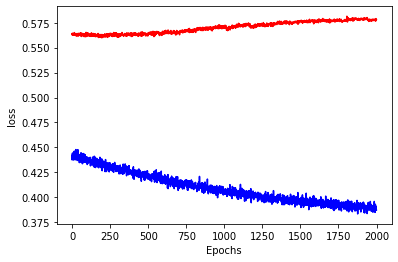

In [366]:
import matplotlib.pyplot as plt
#Visualization of the training process on the loss function
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

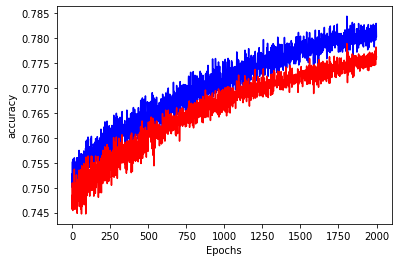

In [367]:
plt.plot(history.history["accuracy"], color="b")
plt.plot(history.history["val_accuracy"], color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.show()

In [368]:
train_predictions_baseline = model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(X_test, batch_size=BATCH_SIZE)

In [369]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('still operating companies detected (True Negatives): ', cm[0][0])
  print('companies Incorrectly forcasted as risky (False Positives): ', cm[0][1])
  print('bankrupt companies missed(False Negatives): ', cm[1][0])
  print('bankrupt companies detected (True Positives): ', cm[1][1])
  print('Total bankrupt companies: ', np.sum(cm[1]))

loss :  0.48125678998453664
tp :  362.0
fp :  1886.0
tn :  6377.0
fn :  56.0
accuracy :  0.77629304
precision :  0.16103202
recall :  0.8660287
auc :  0.89834654

still operating companies detected (True Negatives):  6377
companies Incorrectly forcasted as risky (False Positives):  1886
bankrupt companies missed(False Negatives):  56
bankrupt companies detected (True Positives):  362
Total bankrupt companies:  418


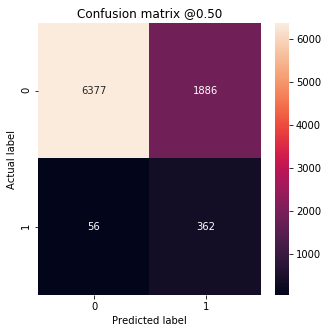

In [370]:
baseline_results = model.evaluate(X_test,Y_test,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()


plot_cm(Y_test, test_predictions_baseline)